# Load Modules

In [1]:
from scipy.io import loadmat
import pandas as pd
import glob
import numpy as np
import xarray as xr
import plotly.express as px
import seaborn as sns
import seaborn.objects as so
import sparse

import matplotlib.pyplot as plt
from scipy.signal import lombscargle
from astropy.timeseries import LombScargle
from joblib import Parallel, delayed
import astropy.units as u
from astropy.visualization import quantity_support

import re
import os
import continuousanalysis as ca
import importlib as imp
import scipy as sci
import re
import loadcontinuousmatlabfiles as lcm
from seaborn import axes_style
# import holoviews as hv
# from holoviews import opts
# hv.extension('bokeh')
import h5py
import dask

import pync
import IPython
def ping(message="Done with script"):
  # a=str(IPython.extract_module_locals()[1]['__vsc_ipynb_file__'])
  pync.notify(message,title="Script Done", sound="default")
h=str(IPython.extract_module_locals()[1]['__vsc_ipynb_file__'])

path='/Users/ryanmaloney/Documents/Matlab/'



In [2]:
ping(h)

In [3]:
dask.config.set({"array.slicing.split_large_chunks": False})

# Import .nc file from matlab

In [9]:
# ls Continuous Data (2hrs)_Batch1_Fly1_Trial1

In [10]:
path='/Users/ryanmaloney/Documents/Matlab/'


In [11]:
imp.reload(lcm)

<module 'loadcontinuousmatlabfiles' from '/Users/ryanmaloney/Continuous Turns/loadcontinuousmatlabfiles.py'>

In [12]:
glob.glob(path+'*.nc')



['/Users/ryanmaloney/Documents/Matlab/CirclingData_24h_B8_F35_T2.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B5_F21_T29.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B1_F33_T6.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B1_F24_T26.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B4_F5_T2.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B3_F2_T6.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B4_F13_T4.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B6_F20_T16.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_24h_B8_F31_T10.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B6_F30_T23.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_24h_B7_F10_T4.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B5_F5_T2.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B1_F40_T20.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_24h_B4_F13_T8.nc',
 '/Users/ryanmaloney/Docume

In [13]:
test=xr.load_dataset(path+'CirclingData_2h_B1_F1_T2.nc')


In [14]:
test

<xarray.Dataset>
Dimensions:           (Fly: 1, Batch: 1, recording_length: 1, Trial: 1, t: 40559)
Coordinates:
  * Fly               (Fly) int8 1
  * Batch             (Batch) int8 1
  * recording_length  (recording_length) int8 2
  * Trial             (Trial) int8 2
Dimensions without coordinates: t
Data variables:
    inx               (Trial, Batch, Fly, t) float64 5.5 7.4 ... 83.33 83.33
    iny               (Trial, Batch, Fly, t) float64 55.61 57.6 ... 22.33 22.33
    theta             (Trial, Batch, Fly, t) float64 2.908 2.849 ... -0.5641
    r                 (Trial, Batch, Fly, t) float64 0.4525 0.4382 ... 0.4808
    direction         (Trial, Batch, Fly, t) float64 nan 0.8083 ... nan nan
    speed             (Trial, Batch, Fly, t) float64 nan 27.5 34.21 ... 0.0 0.0
    turning           (Trial, Batch, Fly, t) float64 nan nan 0.06746 ... nan nan
    angle             (Trial, Batch, Fly, t) float64 nan 0.8917 ... nan nan
    timestamps        (Trial, Batch, Fly, t) float64 1.548e+09 ... 1.548e+09

In [15]:
test['timestamps'].values.squeeze()

array([1.54780939e+09, 1.54780939e+09, 1.54780940e+09, ...,
       1.54781658e+09, 1.54781658e+09, 1.54781658e+09])

In [16]:
test['timestamps'].values=pd.to_datetime(test['timestamps'].values.squeeze(),unit='s', origin='unix').values.reshape(1,1,1,max(test['timestamps'].values.shape))

In [17]:
test

<xarray.Dataset>
Dimensions:           (Fly: 1, Batch: 1, recording_length: 1, Trial: 1, t: 40559)
Coordinates:
  * Fly               (Fly) int8 1
  * Batch             (Batch) int8 1
  * recording_length  (recording_length) int8 2
  * Trial             (Trial) int8 2
Dimensions without coordinates: t
Data variables:
    inx               (Trial, Batch, Fly, t) float64 5.5 7.4 ... 83.33 83.33
    iny               (Trial, Batch, Fly, t) float64 55.61 57.6 ... 22.33 22.33
    theta             (Trial, Batch, Fly, t) float64 2.908 2.849 ... -0.5641
    r                 (Trial, Batch, Fly, t) float64 0.4525 0.4382 ... 0.4808
    direction         (Trial, Batch, Fly, t) float64 nan 0.8083 ... nan nan
    speed             (Trial, Batch, Fly, t) float64 nan 27.5 34.21 ... 0.0 0.0
    turning           (Trial, Batch, Fly, t) float64 nan nan 0.06746 ... nan nan
    angle             (Trial, Batch, Fly, t) float64 nan 0.8917 ... nan nan
    timestamps        (Trial, Batch, Fly, t) datetime64[ns] 2019-01-18T11:03:...

In [18]:
# test=test.set_coords(['timestamp', 'Fly', 'Batch'])
# test.unstack(sparse=True)

In [19]:
test_sparse=test.unstack(sparse=True)

In [20]:
test_sparse

<xarray.Dataset>
Dimensions:           (Fly: 1, Batch: 1, recording_length: 1, Trial: 1, t: 40559)
Coordinates:
  * Fly               (Fly) int8 1
  * Batch             (Batch) int8 1
  * recording_length  (recording_length) int8 2
  * Trial             (Trial) int8 2
Dimensions without coordinates: t
Data variables:
    inx               (Trial, Batch, Fly, t) float64 5.5 7.4 ... 83.33 83.33
    iny               (Trial, Batch, Fly, t) float64 55.61 57.6 ... 22.33 22.33
    theta             (Trial, Batch, Fly, t) float64 2.908 2.849 ... -0.5641
    r                 (Trial, Batch, Fly, t) float64 0.4525 0.4382 ... 0.4808
    direction         (Trial, Batch, Fly, t) float64 nan 0.8083 ... nan nan
    speed             (Trial, Batch, Fly, t) float64 nan 27.5 34.21 ... 0.0 0.0
    turning           (Trial, Batch, Fly, t) float64 nan nan 0.06746 ... nan nan
    angle             (Trial, Batch, Fly, t) float64 nan 0.8917 ... nan nan
    timestamps        (Trial, Batch, Fly, t) datetime64[ns] 2019-01-18T11:03:...

<Axes: ylabel='Count'>

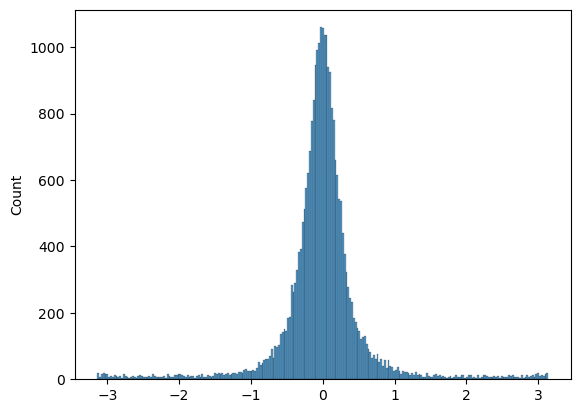

In [21]:
sns.histplot(test['turning'].squeeze())

/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


<Axes: ylabel='Count'>

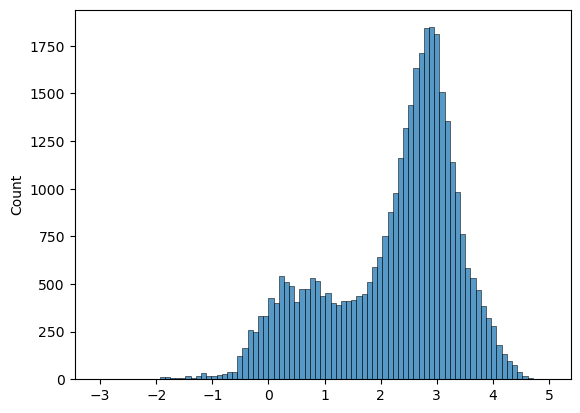

In [22]:
sns.histplot(np.log(test['speed']).squeeze())

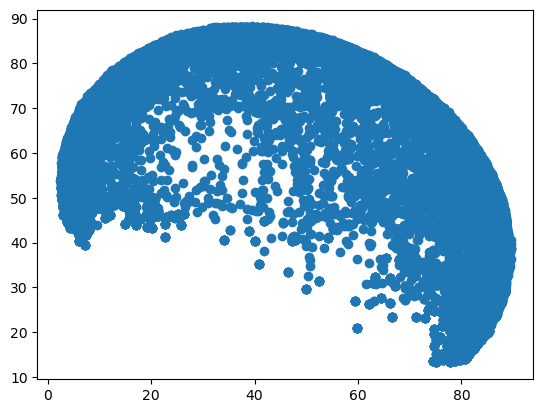

In [23]:
plt.scatter(test['inx'],test['iny'])

In [24]:
glob.glob(path+"CirclingData_2h*.nc")

['/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B5_F21_T29.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B1_F33_T6.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B1_F24_T26.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B4_F5_T2.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B3_F2_T6.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B4_F13_T4.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B6_F20_T16.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B6_F30_T23.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B5_F5_T2.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B1_F40_T20.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B3_F41_T16.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B1_F15_T30.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B2_F22_T6.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B3_F23_T2.nc',
 '/Users/ryanmaloney/Documents

In [25]:
# all2hrdata=xr.open_mfdataset(glob.glob(path+"CirclingData_2h_B2*T[1 2].nc"))

In [26]:
glob.glob(path+"CirclingData_2h_B2*T[1 2].nc")[0:2]


['/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B2_F41_T2.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B2_F39_T2.nc']

### Trying to load raw matlab files together

This path isn't particularly fruitful, as the files can't be combined along time, being different lengths

In [27]:
# xr.open_mfdataset(glob.glob(path+"CirclingData_2h_B2*T[1 2].nc")[0:2])

In [28]:
testfiles=glob.glob(path+"CirclingData_2h_B2*T[1 2].nc")[0:2]


In [29]:
testfiles


['/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B2_F41_T2.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B2_F39_T2.nc']

In [30]:
file1=xr.open_dataset(testfiles[0])
file1

<xarray.Dataset>
Dimensions:           (Fly: 1, Batch: 1, recording_length: 1, Trial: 1, t: 13118)
Coordinates:
  * Fly               (Fly) int8 41
  * Batch             (Batch) int8 2
  * recording_length  (recording_length) int8 2
  * Trial             (Trial) int8 2
Dimensions without coordinates: t
Data variables:
    inx               (Trial, Batch, Fly, t) float64 ...
    iny               (Trial, Batch, Fly, t) float64 ...
    theta             (Trial, Batch, Fly, t) float64 ...
    r                 (Trial, Batch, Fly, t) float64 ...
    direction         (Trial, Batch, Fly, t) float64 ...
    speed             (Trial, Batch, Fly, t) float64 ...
    turning           (Trial, Batch, Fly, t) float64 ...
    angle             (Trial, Batch, Fly, t) float64 ...
    timestamps        (Trial, Batch, Fly, t) float64 ...

In [31]:
file2=xr.open_dataset(testfiles[1])
file2

<xarray.Dataset>
Dimensions:           (Fly: 1, Batch: 1, recording_length: 1, Trial: 1, t: 8103)
Coordinates:
  * Fly               (Fly) int8 39
  * Batch             (Batch) int8 2
  * recording_length  (recording_length) int8 2
  * Trial             (Trial) int8 2
Dimensions without coordinates: t
Data variables:
    inx               (Trial, Batch, Fly, t) float64 ...
    iny               (Trial, Batch, Fly, t) float64 ...
    theta             (Trial, Batch, Fly, t) float64 ...
    r                 (Trial, Batch, Fly, t) float64 ...
    direction         (Trial, Batch, Fly, t) float64 ...
    speed             (Trial, Batch, Fly, t) float64 ...
    turning           (Trial, Batch, Fly, t) float64 ...
    angle             (Trial, Batch, Fly, t) float64 ...
    timestamps        (Trial, Batch, Fly, t) float64 ...

In [32]:
xr.concat([file1, file2], dim="t").to_netcdf('concatbyt.nc')

In [33]:
file1s=file1.stack(metadata=["Fly", "Batch", "recording_length", "Trial", "t"])

In [34]:
file2s=file2.stack(metadata=["Fly", "Batch", "recording_length", "Trial", "t"])

In [35]:
fileboths=xr.merge([file1s, file2s])

In [36]:
# fileboths.to_netcdf('testboth.nc')

In [37]:
fileboths.unstack()

<xarray.Dataset>
Dimensions:           (Fly: 2, Batch: 1, recording_length: 1, Trial: 1, t: 13118)
Coordinates:
  * Fly               (Fly) int8 39 41
  * Batch             (Batch) int8 2
  * recording_length  (recording_length) int8 2
  * Trial             (Trial) int8 2
  * t                 (t) int64 0 1 2 3 4 5 ... 13113 13114 13115 13116 13117
Data variables:
    inx               (Fly, Batch, recording_length, Trial, t) float64 59.62 ...
    iny               (Fly, Batch, recording_length, Trial, t) float64 4.5 .....
    theta             (Fly, Batch, recording_length, Trial, t) float64 -1.372...
    r                 (Fly, Batch, recording_length, Trial, t) float64 0.4645...
    direction         (Fly, Batch, recording_length, Trial, t) float64 nan .....
    speed             (Fly, Batch, recording_length, Trial, t) float64 nan .....
    turning           (Fly, Batch, recording_length, Trial, t) float64 nan .....
    angle             (Fly, Batch, recording_length, Trial, t) float64 nan .....
    timestamps        (Fly, Batch, recording_length, Trial, t) float64 1.551e...

In [38]:
fileboths["inx"].to_pandas()

Fly  Batch  recording_length  Trial  t    
39   2      2                 2      0        59.625000
                                     1        59.666687
                                     2        59.166687
                                     3        59.543457
                                     4        59.543457
                                                ...    
41   2      2                 2      13113    88.562500
                                     13114    88.562500
                                     13115    88.562500
                                     13116    88.562500
                                     13117    88.562500
Length: 21221, dtype: float64

In [39]:
fdask=fileboths.to_dask_dataframe()

In [40]:
fdask

Dask DataFrame Structure:
              metadata    Fly  Batch recording_length  Trial      t      inx      iny    theta        r direction    speed  turning    angle timestamps
npartitions=1                                                                                                                                          
0               object  int64  int64            int64  int64  int64  float64  float64  float64  float64   float64  float64  float64  float64    float64
21220              ...    ...    ...              ...    ...    ...      ...      ...      ...      ...       ...      ...      ...      ...        ...
Dask Name: concat-indexed, 59 tasks

In [41]:
fdask.groupby("Fly").mean()

/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/dask/utils.py:1070: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return getattr(__obj, self.method)(*args, **kwargs)


Dask DataFrame Structure:
                 Batch recording_length    Trial        t      inx      iny    theta        r direction    speed  turning    angle timestamps
npartitions=1                                                                                                                                
               float64          float64  float64  float64  float64  float64  float64  float64   float64  float64  float64  float64    float64
                   ...              ...      ...      ...      ...      ...      ...      ...       ...      ...      ...      ...        ...
Dask Name: truediv, 65 tasks

In [42]:
fulllist=glob.glob(path+"CirclingData_2h_B1_F2_*.nc")

In [43]:
fulllist

['/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B1_F2_T31.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B1_F2_T21.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B1_F2_T15.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B1_F2_T35.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B1_F2_T11.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B1_F2_T25.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B1_F2_T34.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B1_F2_T10.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B1_F2_T24.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B1_F2_T30.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B1_F2_T20.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B1_F2_T14.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B1_F2_T1.nc',
 '/Users/ryanmaloney/Documents/Matlab/CirclingData_2h_B1_F2_T5.nc',
 '/Users/ryanmaloney/Documents/Matla

In [44]:
xarraysubset=xr.open_mfdataset(fulllist, combine="nested", concat_dim="t")

In [45]:
xarray_1fly=xarraysubset.set_coords("timestamps").squeeze()
xarray_1fly

<xarray.Dataset>
Dimensions:           (Trial: 38, t: 2634600)
Coordinates:
    Fly               int8 2
    Batch             int8 1
    recording_length  int8 2
  * Trial             (Trial) int8 1 2 3 4 5 6 7 8 9 ... 31 32 33 34 35 36 37 38
    timestamps        (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
Dimensions without coordinates: t
Data variables:
    inx               (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
    iny               (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
    theta             (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
    r                 (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
    direction         (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
    speed             (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
    turning           (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
    angle             (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>

In [46]:
# xarray_1fly=xarray_1fly.swap_dims({"t":"timestamps"})

In [47]:
xarray_1fly

<xarray.Dataset>
Dimensions:           (Trial: 38, t: 2634600)
Coordinates:
    Fly               int8 2
    Batch             int8 1
    recording_length  int8 2
  * Trial             (Trial) int8 1 2 3 4 5 6 7 8 9 ... 31 32 33 34 35 36 37 38
    timestamps        (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
Dimensions without coordinates: t
Data variables:
    inx               (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
    iny               (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
    theta             (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
    r                 (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
    direction         (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
    speed             (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
    turning           (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
    angle             (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>

In [48]:
# xarray_1fly['timestamps']=pd.to_datetime(xarray_1fly['timestamps'], unit='s', origin='unix')

In [49]:
xarray_1fly

<xarray.Dataset>
Dimensions:           (Trial: 38, t: 2634600)
Coordinates:
    Fly               int8 2
    Batch             int8 1
    recording_length  int8 2
  * Trial             (Trial) int8 1 2 3 4 5 6 7 8 9 ... 31 32 33 34 35 36 37 38
    timestamps        (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
Dimensions without coordinates: t
Data variables:
    inx               (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
    iny               (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
    theta             (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
    r                 (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
    direction         (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
    speed             (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
    turning           (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>
    angle             (Trial, t) float64 dask.array<chunksize=(38, 71424), meta=np.ndarray>

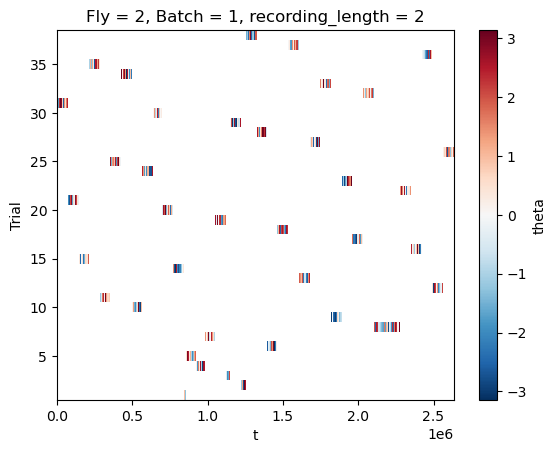

In [50]:
xarray_1fly['theta'].plot()

In [51]:
xarray_1fly.sortby("timestamps")['theta'].plot()

ValueError: Input DataArray is not 1-D.

In [52]:
xarray_1fly.sortby("timestamps")

ValueError: Input DataArray is not 1-D.

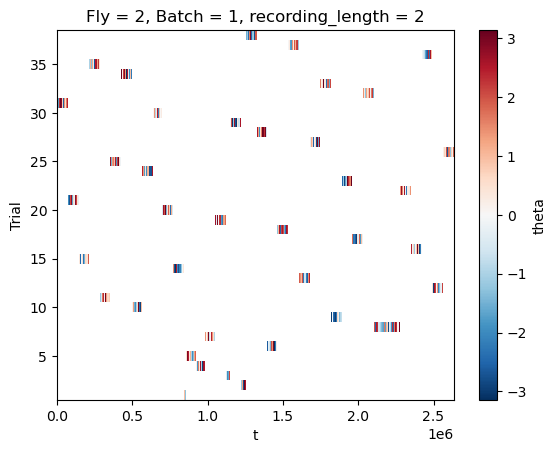

In [53]:
xarray_1fly['theta'].plot()

In [ ]:
xarray_1fly=xarray_1fly.sortby("timestamps")

In [ ]:
xarray_1fly

In [ ]:
xarray_1fly.to_netcdf('testfly.nc')

In [ ]:
np.sum(np.isnan(xarray_1fly["inx"]).compute())

In [ ]:
np.arange(1,5)

In [ ]:
imp.reload(lcm)
lcm.import_dask_matlab_files(path)

In [ ]:
path

In [ ]:
oneflylist=glob.glob("/Users/ryanmaloney/Documents/Matlab/CirclingData_24h_B5_F40_T*.nc")

In [ ]:
len(oneflylist)

In [ ]:
glob.glob("CirclingData_2h_B1_F[0-9].nc")

# Test single fly load

24 1 1
['inx', 'iny', 'theta', 'r', 'direction', 'speed', 'turning', 'angle']
Speed Logged
theta
r
direction
speed
turning
angle
speed_logged
Circling_Summary_24h_B1_F1.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 1 1


<xarray.Dataset>
Dimensions:               (Bins_direction: 200, Fly: 1, Batch: 1, Freq: 1000,
                           Shuffled: 2, Bins_angle: 200, Bins_theta: 200,
                           Measure: 4, Bins_turning: 200,
                           Bins_speed_logged: 200, Bins_r: 200)
Coordinates:
  * Bins_direction        (Bins_direction) float64 -3.126 -3.094 ... 3.094 3.126
  * Fly                   (Fly) int8 1
  * Batch                 (Batch) int8 1
  * Freq                  (Freq) float64 3.858e-07 3.922e-07 ... 4.919 5.0
  * Shuffled              (Shuffled) <U17 'Non-shuffled Data' 'Shuffled'
  * Bins_angle            (Bins_angle) float64 -0.995 -0.985 ... 0.985 0.995
  * Bins_theta            (Bins_theta) float64 -3.126 -3.094 ... 3.094 3.126
    recording_length      int8 24
  * Measure               (Measure) object 'Mean' 'Std' 'Min' 'Max'
  * Bins_turning          (Bins_turning) float64 -6.252 -6.189 ... 6.189 6.252
  * Bins_speed_logged     (Bins_speed_logged) float64 -6.965 -6.895 ... 6.965
  * Bins_r                (Bins_r) float64 0.003 0.009 0.015 ... 1.191 1.197
Data variables: (12/19)
    direction_bins        (Bins_direction, Fly, Batch) float64 202.0 ... 196.0
    direction_psd         (Freq, Fly, Batch, Shuffled) float64 0.0008327 ... ...
    angle_bins            (Bins_angle, Fly, Batch) float64 6.663e+03 ... 7.35...
    angle_psd             (Freq, Fly, Batch, Shuffled) float64 0.0009525 ... ...
    theta_bins            (Bins_theta, Fly, Batch) float64 1.166e+03 ... 436.0
    theta_summary         (Measure, Fly, Batch) float64 -0.001312 ... 3.141
    ...                    ...
    r_bins                (Bins_r, Fly, Batch) float64 4.0 5.0 14.0 ... 0.0 0.0
    r_psd                 (Freq, Fly, Batch, Shuffled) float64 0.09462 ... 6....
    r_summary             (Measure, Fly, Batch) float64 0.3572 0.0961 ... 0.5467
    direction_summary     (Measure, Fly, Batch) float64 0.009362 1.828 ... 3.142
    speed_summary         (Measure, Fly, Batch) float64 3.356 6.626 0.0 489.7
    angle_summary         (Measure, Fly, Batch) float64 0.0287 0.8736 -1.0 1.0

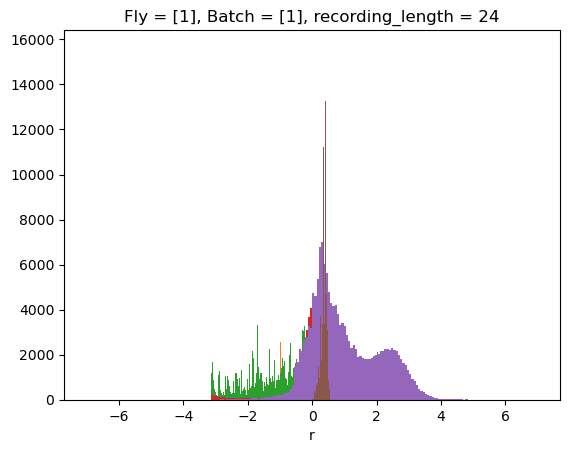

In [112]:
imp.reload(lcm)
path='/Users/ryanmaloney/Documents/Matlab/'

x1=lcm.importonefile(path, d=24, b=1, f=1, save_timeseries=False, override=True)
ping(h)

x1


In [101]:
p=xr.load_dataarray("/Users/ryanmaloney/Continuous Turns/speed_psd_not_shuffled.nc")
p

<xarray.DataArray (Freq: 1000, Fly: 1, Batch: 1, Shuffled: 1)>
array([[[[1.19346348e-02]]],


       [[[1.19343076e-02]]],


       [[[1.19339695e-02]]],


       [[[1.19336199e-02]]],


       [[[1.19332586e-02]]],


       [[[1.19328851e-02]]],


       [[[1.19324989e-02]]],

...

       [[[2.09828208e-07]]],


       [[[7.91301036e-06]]],


       [[[1.19662968e-05]]],


       [[[8.23062709e-06]]],


       [[[5.28428461e-07]]],


       [[[2.68287287e-07]]],


       [[[2.19152874e-05]]]])
Coordinates:
  * Freq      (Freq) float64 3.858e-07 3.922e-07 3.987e-07 ... 4.839 4.919 5.0
  * Fly       (Fly) int8 1
  * Batch     (Batch) int8 1
  * Shuffled  (Shuffled) object 'Non-shuffled Data'

In [102]:
ps=xr.load_dataarray("/Users/ryanmaloney/Continuous Turns/speed_psd_shuffled.nc")
ps

<xarray.DataArray (Freq: 1000, Fly: 1, Batch: 1, Shuffled: 1)>
array([[[[6.57800811e-07]]],


       [[[6.57856461e-07]]],


       [[[6.57913975e-07]]],


       [[[6.57973414e-07]]],


       [[[6.58034842e-07]]],


       [[[6.58098328e-07]]],


       [[[6.58163940e-07]]],

...

       [[[4.90398873e-06]]],


       [[[2.31082712e-06]]],


       [[[1.53909382e-05]]],


       [[[2.95598859e-06]]],


       [[[4.06901022e-06]]],


       [[[1.17984613e-05]]],


       [[[1.65525675e-05]]]])
Coordinates:
  * Freq      (Freq) float64 3.858e-07 3.922e-07 3.987e-07 ... 4.839 4.919 5.0
  * Fly       (Fly) int8 1
  * Batch     (Batch) int8 1
  * Shuffled  (Shuffled) object 'Shuffled Data'

In [104]:
xr.concat([p, ps], dim="Shuffled")

<xarray.DataArray (Freq: 1000, Fly: 1, Batch: 1, Shuffled: 2)>
array([[[[1.19346348e-02, 6.57800811e-07]]],


       [[[1.19343076e-02, 6.57856461e-07]]],


       [[[1.19339695e-02, 6.57913975e-07]]],


       ...,


       [[[5.28428461e-07, 4.06901022e-06]]],


       [[[2.68287287e-07, 1.17984613e-05]]],


       [[[2.19152874e-05, 1.65525675e-05]]]])
Coordinates:
  * Freq      (Freq) float64 3.858e-07 3.922e-07 3.987e-07 ... 4.839 4.919 5.0
  * Fly       (Fly) int8 1
  * Batch     (Batch) int8 1
  * Shuffled  (Shuffled) object 'Non-shuffled Data' 'Shuffled Data'

In [62]:
x1[]

<xarray.Dataset>
Dimensions:               (Bins_direction: 200, Fly: 1, Batch: 1, Freq: 1000,
                           Shuffled: 2, Bins_angle: 200, Bins_theta: 200,
                           Measure: 4, Bins_turning: 200,
                           Bins_speed_logged: 200, Bins_r: 200)
Coordinates:
  * Bins_direction        (Bins_direction) float64 -3.126 -3.094 ... 3.094 3.126
  * Fly                   (Fly) int8 1
  * Batch                 (Batch) int8 1
  * Freq                  (Freq) float64 3.858e-07 3.922e-07 ... 4.919 5.0
  * Shuffled              (Shuffled) <U16 'Non-shuffle Data' 'Shuffled'
  * Bins_angle            (Bins_angle) float64 -0.995 -0.985 ... 0.985 0.995
  * Bins_theta            (Bins_theta) float64 -3.126 -3.094 ... 3.094 3.126
  * Measure               (Measure) object 'Mean' 'Std' 'Min' 'Max'
  * Bins_turning          (Bins_turning) float64 -6.252 -6.189 ... 6.189 6.252
  * Bins_speed_logged     (Bins_speed_logged) float64 -6.965 -6.895 ... 6.965
  * Bins_r                (Bins_r) float64 0.003 0.009 0.015 ... 1.191 1.197
    recording_length      int8 24
Data variables: (12/19)
    direction_bins        (Bins_direction, Fly, Batch) float64 202.0 ... 196.0
    direction_psd         (Freq, Fly, Batch, Shuffled) float64 0.0008327 ... ...
    angle_bins            (Bins_angle, Fly, Batch) float64 6.663e+03 ... 7.35...
    angle_psd             (Freq, Fly, Batch, Shuffled) float64 nan ... 2.58e-05
    theta_bins            (Bins_theta, Fly, Batch) float64 1.166e+03 ... 436.0
    theta_summary         (Measure, Fly, Batch) float64 -0.001312 ... 3.141
    ...                    ...
    r_bins                (Bins_r, Fly, Batch) float64 4.0 5.0 14.0 ... 0.0 0.0
    r_psd                 (Freq, Fly, Batch, Shuffled) float64 nan ... 6.115e-06
    r_summary             (Measure, Fly, Batch) float64 0.3572 0.0961 ... 0.5467
    direction_summary     (Measure, Fly, Batch) float64 0.009362 1.828 ... 3.142
    speed_summary         (Measure, Fly, Batch) float64 3.356 6.626 0.0 489.7
    angle_summary         (Measure, Fly, Batch) float64 0.0287 0.8736 -1.0 1.0

In [87]:
a=x1["speed_psd"].squeeze()
a
#Speed PSD fails, see line 598 of loadcontinuousmatlabfiles.py -> Get Bins 633
#bleh, it's the first call on xarray that made "non shuffle" the variable name.

<xarray.DataArray 'speed_psd' (Freq: 1000, Shuffled: 2)>
array([[           nan, 6.57416783e-06],
       [           nan, 6.57439323e-06],
       [           nan, 6.57462613e-06],
       ...,
       [           nan, 1.27195389e-05],
       [           nan, 4.84185271e-06],
       [           nan, 1.95181723e-05]])
Coordinates:
    Fly               int8 1
    Batch             int8 1
  * Freq              (Freq) float64 3.858e-07 3.922e-07 3.987e-07 ... 4.919 5.0
  * Shuffled          (Shuffled) <U16 'Non-shuffle Data' 'Shuffled'
    recording_length  int8 24

NameError: name 'p' is not defined

In [73]:
x["speed"]

NameError: name 'x' is not defined

In [ ]:
xr.DataArray(np.expand_dims(a[0], axis=[1,2]), {"Bins_turning":np.mean([a[1][0:-1], a[1][1:]], axis=0),"Fly":x1.Fly, "Batch":x1.Batch})


In [ ]:
ping(h)

In [ ]:
for varlist in list(x1.variables):
    if "summary" in varlist:
        print(varlist)

In [ ]:
testlist=glob.glob("Summary Data/*")
testlist[0:4]

In [ ]:
test_summary=xr.open_mfdataset(testlist[0:10], data_vars=["speed_psd"])
test_summary
# print('hi')

In [ ]:
tsm_pds=test_summary["speed_psd"].squeeze().compute().to_dataframe().reset_index()
tsm_pds.dropna()

In [ ]:
so.Plot(data=tsm_pds.dropna(), x="Freq", y="speed_psd", color="Shuffled").add(so.Line(), so.Agg()).add(so.Band(), so.Est(), group="Shuffled").scale(x="log", y="log")

In [ ]:
import re
re.search(x1)

In [ ]:
if "summary" in "speed_logged_summary":
  print('yes')

In [ ]:
for summary in list(x1):
  re.search(r'*summary',summary)

In [ ]:
imp.reload(lcm)
x2=lcm.importonefile(path, d=2, b=1, f=2, save_timeseries=False, override=True)
x2

In [ ]:
x2=xr.open_dataset("Circling_Summary_2h_B1_F2.nc")
x2

In [ ]:
x2["speed_psd"].to_dataframe().reset_index()

In [ ]:
so.Plot(data=x2["speed_psd"].to_dataframe().reset_index(), x="Freq", y="speed_psd", color="Shuffled").add(so.Line(), so.Agg()).add(so.Band(), so.Est(), group="Shuffled").scale(x="log", y="log")

In [ ]:
x3=lcm.importonefile(path, d=2, b=2, f=1, save_timeseries=False)
x3

In [ ]:
# x3=lcm.importonefile(path, d=2, b=2, f=1, save_timeseries=False)
x4=lcm.importonefile(path, d=2, b=2, f=2, save_timeseries=False)
x4

In [ ]:
print(x1.dims)
print(x2.dims)
print(x3.dims)
print(x4.dims)

In [ ]:
print(x1['inx'].name)

In [ ]:
x1

In [ ]:
# for foobar in x1:
#   x1[foobar+"_summary"]=xr.concat([x1[foobar].mean(dim="t").compute().expand_dims(dim={"Measure":["Mean"]}),
#   x1[foobar].std(dim="t").compute().expand_dims(dim={"Measure":["Std"]}),
#   x1[foobar].min(dim="t").compute().expand_dims(dim={"Measure":["Min"]}),
#   x1[foobar].max(dim="t").compute().expand_dims(dim={"Measure":["Max"]}),
#   ], dim="Measure")
#   x1[foobar+"_bins"]=x1[foobar].histplot
#   # print(x1[foobar].max().values)

In [ ]:
np.expand_dims(x1["speed"],axis=[1,2]).shape

In [ ]:
imp.reload(lcm)
x1_bins=lcm.get_bins(x1)
x1_bins

In [ ]:
x1_bins.to_netcdf('x1_bins.nc')

In [ ]:
x1_t=xr.open_dataset('x1_bins.nc')
x1_t

In [ ]:
a=x1_bins["speed_psd"].plot()
plt.xscale("log")

In [ ]:
imp.reload(lcm)a
x2_bins=lcm.get_bins(x2)
x2_bins

In [ ]:
x1

In [ ]:
x1["angle"]
y=x1["timestamps"]

In [ ]:
imp.reload(lcm)

In [ ]:
f=ca.calcfreq(fres=1000, log=True, fmax=5, fmin=1/60/60/24/30)/u.second

In [ ]:
a=lcm.calcpowerforfly(x1["angle"], x1["timestamps"])

In [ ]:
a

In [ ]:
xr.DataArray(np.expand_dims(a.squeeze(), axis=[1,2]), coords={"Frequency":f,"Fly":[1], "Batch":[1]})

In [ ]:
plt.plot(a)

In [ ]:
plt.plot(a[1],a[0])

In [ ]:
f=ca.calcfreq(fres=100, log=True, fmax=5, fmin=1/60/60/24/30)

In [ ]:
f/u.second

In [ ]:
a[2].power(f/u.second)

In [ ]:
x1["angle"].compute()

In [ ]:
x1["angle"].compute()

In [ ]:
np.array(x1["timestamps"], dtype=float)*u.second*10**-9

In [ ]:
ls.autopower()

In [ ]:
ls.Autopower()

In [ ]:
x1["angle"]

# Load and calculate power/bins for each fly

In [ ]:
print(path)

In [ ]:
pwd

In [ ]:
imp.reload(lcm)
path="/Users/ryanmaloney/Documents/Matlab/ContinuousData/"
b=1
d=2
f=1
oneflylist=glob.glob(path+"CirclingData_"+str(d)+"h_B"+str(b)+"_F"+str(f)+"_T*.nc")
oneflylist

In [ ]:
xarraysubset=xr.open_mfdataset(oneflylist, combine="nested", concat_dim="t").compute().stack({"thack":["Trial", "t"]}).squeeze().swap_dims({"thack":"timestamps"})
xarraysubset

In [ ]:
imp.reload(lcm)

duration=[2,24]
batch=np.arange(1,8)
fly=np.arange(1,43)

duration=[2]
batch=np.arange(1,2)
fly=np.arange(1,2)


iterables=[duration, batch, fly]
index=pd.MultiIndex.from_product(iterables, names=["Duration", "Batch", "Fly"])
index

Parallel(n_jobs=8, verbose=20)(delayed(lcm.importonefile(path, i[0],i[1],i[2])) for i in index)

In [3]:
imp.reload(lcm)

lcm.import_dask_matlab_files(path, override=False)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


2 1 8
Circling_Summary_2h_B1_F8.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 1 4
Circling_Summary_2h_B1_F4.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 1 2
Circling_Summary_2h_B1_F2.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 1 1
Circling_Summary_2h_B1_F1.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 1 6
Circling_Summary_2h_B1_F6.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 1 3
Circling_Summary_2h_B1_F3.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 1 7
Circling_Summary_2h_B1_F7.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 1 5
Circling_Summary_2h_B1_F5.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 1 9
Circling_Summary_2h_B1_F9.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 1 10
Circling_Summary_2h_B1_F10.nc already e

[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.7s


2 2 8
Circling_Summary_2h_B2_F8.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 2 10
Circling_Summary_2h_B2_F10.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 2 12
Circling_Summary_2h_B2_F12.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 2 16
Circling_Summary_2h_B2_F16.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 2 18
Circling_Summary_2h_B2_F18.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 2 14
Circling_Summary_2h_B2_F14.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 2 20
Circling_Summary_2h_B2_F20.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 2 22
Circling_Summary_2h_B2_F22.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 2 23
Circling_Summary_2h_B2_F23.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 2 25
Circling_Summary_2h_B2_

[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    2.9s


2 4 5
Circling_Summary_2h_B4_F5.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 4 1
Circling_Summary_2h_B4_F1.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 3 39
Circling_Summary_2h_B3_F39.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 3 31
Circling_Summary_2h_B3_F31.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 4 9
Circling_Summary_2h_B4_F9.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 4 17
Circling_Summary_2h_B4_F17.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 4 13
Circling_Summary_2h_B4_F13.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 3 36
Circling_Summary_2h_B3_F36.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 4 2
Circling_Summary_2h_B4_F2.nc already exists in /Users/ryanmaloney/Documents/Matlab/ , skipping this
2 4 6
Circling_Summary_2h_B4_F6.nc a

/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F1.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F35.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F9.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F17.nc
Circling_Summary_24h_B1_F11.nc
Circling_Summary_24h_B1_F27.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F19.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F4.nc
End 24 1 35
24 1 36
End 24 2 1
24 2 2


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F2.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F36.nc
End 24 2 2
24 2 3


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F3.nc
End 24 1 11
24 1 12


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F12.nc
End 24 1 27
24 1 28


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F28.nc
End 24 2 3
24 2 4


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F4.nc
End 24 1 36
24 1 37


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F37.nc
End 24 2 9
24 2 10


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F10.nc
End 24 2 17
24 2 18


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F18.nc
End 24 1 4
24 1 5


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F5.nc
End 24 1 37
24 1 38
End 24 1 12
24 1 13


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F13.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F38.nc
End 24 1 19
24 1 20


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F20.nc
End 24 1 5
24 1 6


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F6.nc
End 24 2 18
24 2 19


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F19.nc
End 24 2 4
24 2 5


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F5.nc
End 24 1 6
24 1 7


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F7.nc
End 24 1 13
24 1 14
End 24 2 10
24 2 11


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F14.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F11.nc
End 24 1 14
24 1 15
End 24 1 28
24 1 29
End 24 2 19
24 2 20


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F20.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F15.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F29.nc
End 24 2 11
24 2 12


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F12.nc
End 24 1 7
24 1 8


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F8.nc
End 24 2 5
24 2 6


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F6.nc
End 24 1 38
24 1 39


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F39.nc
End 24 2 6
24 2 7


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F7.nc
End 24 1 8
24 1 9


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F9.nc
End 24 1 20
24 1 21


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F21.nc
End 24 1 15
24 1 16
End 24 2 20
24 2 21


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F21.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F16.nc
End 24 2 21
24 2 22


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F22.nc
End 24 2 12
24 2 13


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F13.nc
End 24 2 7
24 2 8


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F8.nc
End 24 1 9
24 1 10


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F10.nc
End 24 1 29
24 1 30


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F30.nc
End 24 1 39
24 1 40


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F40.nc
End 24 2 22
24 2 23


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F23.nc
End 24 2 8


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


24 2 25


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F25.nc
End 24 1 40
24 1 41
End 24 2 13
24 2 14


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F14.nc
End 24 1 16
24 1 17
Circling_Summary_24h_B1_F41.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F17.nc
End 24 2 25
24 2 26


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F26.nc
End 24 2 23
24 2 24
Couldn't Find any files here: /Users/ryanmaloney/Documents/Matlab/CirclingData_24h_B2_F24_T*.nc
End 24 2 24
24 2 33


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F33.nc
End 24 1 17
24 1 18


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F18.nc
End 24 1 21
24 1 22


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F22.nc
End 24 1 22
24 1 23


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F23.nc
End 24 2 26
24 2 27


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F27.nc
End 24 2 33
24 2 34


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F34.nc
End 24 1 10
24 2 41


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F41.nc
End 24 1 41
24 1 42


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F42.nc
End 24 1 42
24 3 7
Only One trial detected for  Circling_Summary_24h_B3_F7.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B3_F7.nc
End 24 2 34
24 2 35
End 24 2 14
24 2 15


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F35.nc
End 24 3 7
24 3 8
Only One trial detected for  Circling_Summary_24h_B3_F8.nc
Circling_Summary_24h_B3_F8.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F15.nc
End 24 3 8
24 3 9
Only One trial detected for  Circling_Summary_24h_B3_F9.nc
Circling_Summary_24h_B3_F9.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 9
24 3 10
Only One trial detected for  Circling_Summary_24h_B3_F10.nc
Circling_Summary_24h_B3_F10.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 10
24 3 11
Only One trial detected for  Circling_Summary_24h_B3_F11.nc
Circling_Summary_24h_B3_F11.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 1 23
24 1 24
Couldn't Find any files here: /Users/ryanmaloney/Documents/Matlab/CirclingData_24h_B1_F24_T*.nc
End 24 1 24
24 1 25
End 24 3 11
24 3 12
Only One trial detected for  Circling_Summary_24h_B3_F12.nc
Circling_Summary_24h_B3_F12.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F25.nc
End 24 2 41
24 2 42


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F42.nc
End 24 3 12
24 3 13
Only One trial detected for  Circling_Summary_24h_B3_F13.nc
Circling_Summary_24h_B3_F13.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 13
24 3 14
Only One trial detected for  Circling_Summary_24h_B3_F14.nc
Circling_Summary_24h_B3_F14.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 14
24 3 15
Only One trial detected for  Circling_Summary_24h_B3_F15.nc
Circling_Summary_24h_B3_F15.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 15
24 3 16
Only One trial detected for  Circling_Summary_24h_B3_F16.nc
Circling_Summary_24h_B3_F16.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 2 42
24 3 1
Only One trial detected for  Circling_Summary_24h_B3_F1.nc
Circling_Summary_24h_B3_F1.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 16
24 3 17
Only One trial detected for  Circling_Summary_24h_B3_F17.nc
Circling_Summary_24h_B3_F17.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 1
24 3 2
Only One trial detected for  Circling_Summary_24h_B3_F2.nc
Circling_Summary_24h_B3_F2.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 17
24 3 18
Only One trial detected for  Circling_Summary_24h_B3_F18.nc
Circling_Summary_24h_B3_F18.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 2 27
24 2 28
End 24 3 2
24 3 3
Only One trial detected for  Circling_Summary_24h_B3_F3.nc
Circling_Summary_24h_B3_F3.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F28.nc
End 24 3 3
24 3 4
Only One trial detected for  Circling_Summary_24h_B3_F4.nc
Circling_Summary_24h_B3_F4.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 4
24 3 5
Only One trial detected for  Circling_Summary_24h_B3_F5.nc
Circling_Summary_24h_B3_F5.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 18
24 3 19
Only One trial detected for  Circling_Summary_24h_B3_F19.nc
Circling_Summary_24h_B3_F19.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 5
24 3 6
Only One trial detected for  Circling_Summary_24h_B3_F6.nc
Circling_Summary_24h_B3_F6.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 19
24 3 20
Only One trial detected for  Circling_Summary_24h_B3_F20.nc
Circling_Summary_24h_B3_F20.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 6
24 3 23
Only One trial detected for  Circling_Summary_24h_B3_F23.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B3_F23.nc
End 24 3 20
24 3 21
Only One trial detected for  Circling_Summary_24h_B3_F21.nc
Circling_Summary_24h_B3_F21.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 23
24 3 24
Only One trial detected for  Circling_Summary_24h_B3_F24.nc
Circling_Summary_24h_B3_F24.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 2 35
24 2 36


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F36.nc
End 24 1 30
24 1 31
End 24 3 24
24 3 25
Only One trial detected for  Circling_Summary_24h_B3_F25.nc
Circling_Summary_24h_B3_F25.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F31.nc
End 24 3 25
24 3 26
Only One trial detected for  Circling_Summary_24h_B3_F26.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B3_F26.nc
End 24 1 18
End 24 3 21
24 3 22
Only One trial detected for  Circling_Summary_24h_B3_F22.nc
Circling_Summary_24h_B3_F22.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


24 3 31
Only One trial detected for  Circling_Summary_24h_B3_F31.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B3_F31.nc
End 24 3 26
24 3 27
Only One trial detected for  Circling_Summary_24h_B3_F27.nc
Circling_Summary_24h_B3_F27.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 22
24 3 39
Only One trial detected for  Circling_Summary_24h_B3_F39.nc
Circling_Summary_24h_B3_F39.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 39
24 3 40
Only One trial detected for  Circling_Summary_24h_B3_F40.nc
Circling_Summary_24h_B3_F40.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 31
24 3 32
Only One trial detected for  Circling_Summary_24h_B3_F32.nc
Circling_Summary_24h_B3_F32.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 40
24 3 41
Only One trial detected for  Circling_Summary_24h_B3_F41.nc
Circling_Summary_24h_B3_F41.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 41
24 3 42
Only One trial detected for  Circling_Summary_24h_B3_F42.nc
Circling_Summary_24h_B3_F42.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 32
24 3 33
Only One trial detected for  Circling_Summary_24h_B3_F33.nc
Circling_Summary_24h_B3_F33.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 27
24 3 28
Only One trial detected for  Circling_Summary_24h_B3_F28.nc
Circling_Summary_24h_B3_F28.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 28
24 3 29
Only One trial detected for  Circling_Summary_24h_B3_F29.nc
Circling_Summary_24h_B3_F29.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 42
24 4 1
End 24 3 33
24 3 34
Only One trial detected for  Circling_Summary_24h_B3_F34.nc
Circling_Summary_24h_B3_F34.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 34
24 3 35
Only One trial detected for  Circling_Summary_24h_B3_F35.nc
Circling_Summary_24h_B3_F35.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 35
24 3 36
Only One trial detected for  Circling_Summary_24h_B3_F36.nc
Circling_Summary_24h_B3_F36.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 2 28
24 2 29


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F29.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 29
24 3 30
Only One trial detected for  Circling_Summary_24h_B3_F30.nc
Circling_Summary_24h_B3_F30.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F1.nc
End 24 3 36
24 3 37
Only One trial detected for  Circling_Summary_24h_B3_F37.nc
Circling_Summary_24h_B3_F37.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 30
24 4 5


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F5.nc
End 24 3 37
24 3 38
Only One trial detected for  Circling_Summary_24h_B3_F38.nc
Circling_Summary_24h_B3_F38.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 3 38
24 4 13
End 24 2 36
24 2 37


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F37.nc
End 24 4 5
24 4 6
End 24 2 15
24 2 16


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F16.nc
Circling_Summary_24h_B4_F13.nc
End 24 2 37
24 2 38


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F38.nc
End 24 2 29
24 2 30


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F30.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F6.nc
End 24 1 25
24 1 26


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F26.nc
End 24 2 30
24 2 31


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F31.nc
End 24 2 38
24 2 39


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F39.nc
End 24 1 26
24 4 21


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 1 31
24 1 32
Circling_Summary_24h_B4_F21.nc
End 24 2 16
24 4 29


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F29.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 2 39
24 2 40
Circling_Summary_24h_B1_F32.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F40.nc
End 24 2 40
24 4 37


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F37.nc
End 24 2 31
24 2 32


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B2_F32.nc
End 24 2 32
24 5 3


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F3.nc
End 24 4 29
24 4 30


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F30.nc
End 24 4 37
24 4 38


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F38.nc
End 24 5 3
24 5 4


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F4.nc
End 24 4 1
24 4 2


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F2.nc
End 24 4 13
24 4 14


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F14.nc
End 24 1 32
24 1 33


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F33.nc
End 24 4 14
24 4 15


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F15.nc
End 24 4 6
24 4 7


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F7.nc
End 24 4 2
24 4 3
End 24 5 4
24 5 5


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F3.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F5.nc
End 24 4 15
24 4 16
End 24 4 38
24 4 39


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F16.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F39.nc
End 24 4 30
24 4 31


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F31.nc
End 24 1 33
24 1 34


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B1_F34.nc
End 24 1 34
24 5 6


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F6.nc
End 24 4 21
24 4 22


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F22.nc
End 24 4 3
24 4 4


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F4.nc
End 24 5 5
24 5 7


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F7.nc
End 24 4 7
24 4 8
Only One trial detected for  Circling_Summary_24h_B4_F8.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F8.nc
End 24 4 31
24 4 32
End 24 4 39
24 4 40


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F32.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F40.nc
End 24 4 8
24 4 9


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F9.nc
End 24 5 6
24 5 8
End 24 4 4
24 5 9


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F9.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F8.nc
End 24 4 16
24 4 17
End 24 5 7
24 5 10


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F10.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F17.nc
End 24 5 9
24 5 11


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F11.nc
End 24 5 11
24 5 12
End 24 4 9
24 4 10


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F12.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F10.nc
End 24 5 10
24 5 13


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F13.nc
End 24 4 40
24 4 41
Only One trial detected for  Circling_Summary_24h_B4_F41.nc
Circling_Summary_24h_B4_F41.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 4 41
24 4 42


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 4 32
24 4 33
Circling_Summary_24h_B4_F42.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F33.nc
End 24 4 22
24 4 23


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F23.nc
End 24 4 42
24 5 1


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F1.nc
End 24 4 23
24 4 24


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F24.nc
End 24 5 8
24 5 14


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F14.nc
End 24 5 13
24 5 15


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F15.nc
End 24 4 17
24 4 18


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F18.nc
End 24 5 12
24 5 16


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F16.nc
End 24 4 10
24 4 11
Only One trial detected for  Circling_Summary_24h_B4_F11.nc
Circling_Summary_24h_B4_F11.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 4 11
24 4 12


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F12.nc
End 24 4 33
24 4 34


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F34.nc
End 24 5 16
24 5 17


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 5 1
24 5 2
Circling_Summary_24h_B5_F17.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F2.nc
End 24 4 24
24 4 25
Only One trial detected for  Circling_Summary_24h_B4_F25.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F25.nc
End 24 4 25
24 4 26


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F26.nc
End 24 5 2
24 5 18


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F18.nc
End 24 4 34
24 4 35


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F35.nc
End 24 5 14
24 5 19


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F19.nc
End 24 5 18
24 5 20


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F20.nc
End 24 5 20
24 5 21


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F21.nc
End 24 4 18
24 4 19


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F19.nc
End 24 4 35
24 4 36


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F36.nc
End 24 5 19
End 24 5 15
24 5 22
24 5 23


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F23.nc
End 24 5 17
24 5 24


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F24.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 4 12
24 5 25


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F25.nc
Circling_Summary_24h_B5_F22.nc
End 24 5 25
24 5 26
End 24 5 23
24 5 27


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F26.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F27.nc
End 24 4 26
24 4 27


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F27.nc
End 24 5 21
24 5 28


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F28.nc
End 24 5 24
24 5 29


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F29.nc
End 24 4 19
24 4 20


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F20.nc
End 24 4 36
24 5 30


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F30.nc
End 24 5 26
24 5 31
End 24 5 27
24 5 32


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F32.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F31.nc
End 24 5 32
24 5 33


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F33.nc
End 24 5 28
24 5 34


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F34.nc
End 24 5 34
24 5 35


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F35.nc
End 24 5 31
24 5 36


[Parallel(n_jobs=8)]: Done 476 tasks      | elapsed: 122.4min
/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F36.nc
End 24 5 29
24 5 37


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F37.nc
End 24 4 27
24 4 28


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B4_F28.nc
End 24 5 22
24 5 38
End 24 5 37
24 5 39


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F38.nc
End 24 5 30
24 5 40


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F39.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F40.nc
End 24 4 20
24 5 41


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F41.nc
End 24 5 35
24 5 42


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B5_F42.nc
End 24 5 33
24 6 1


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F1.nc
End 24 5 41
24 6 2


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F2.nc
End 24 6 1
24 6 3
End 24 5 36
24 6 4
Only One trial detected for  Circling_Summary_24h_B6_F4.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F4.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F3.nc
End 24 6 4
24 6 5
End 24 5 38
24 6 6


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F6.nc
End 24 6 2
24 6 7


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F5.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F7.nc
End 24 5 39
24 6 8
End 24 5 40
24 6 9


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F9.nc
Circling_Summary_24h_B6_F8.nc
End 24 5 42
24 6 10


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F10.nc
End 24 4 28
24 6 11


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F11.nc
End 24 6 9
24 6 12


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F12.nc
End 24 6 12
24 6 13


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F13.nc
End 24 6 6
24 6 14


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F14.nc
End 24 6 11
24 6 15


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F15.nc
End 24 6 3
24 6 16


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F16.nc
End 24 6 7
24 6 17


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F17.nc
End 24 6 10
24 6 18


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F18.nc
End 24 6 14
24 6 19
End 24 6 13
24 6 20


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F20.nc
Circling_Summary_24h_B6_F19.nc
End 24 6 18
24 6 21


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F21.nc
End 24 6 8
24 6 22


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F22.nc
End 24 6 5
24 6 23


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F23.nc
End 24 6 15
24 6 24


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F24.nc
End 24 6 24
24 6 25


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F25.nc
End 24 6 17
24 6 26


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F26.nc
End 24 6 21
24 6 27


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F27.nc
End 24 6 16
24 6 28


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F28.nc
End 24 6 20
24 6 29


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F29.nc
End 24 6 19
24 6 30


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F30.nc
End 24 6 23
24 6 31


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 6 28
24 6 32
Circling_Summary_24h_B6_F31.nc
End 24 6 22
24 6 33


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F32.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F33.nc
End 24 6 30
24 6 34


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F34.nc
End 24 6 25
24 6 35


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F35.nc
End 24 6 26
24 6 36
End 24 6 31
24 6 37


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F36.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F37.nc
End 24 6 34
24 6 38


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F38.nc
End 24 6 35
24 6 39


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F39.nc
End 24 6 39
24 6 40


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F40.nc
End 24 6 27
End 24 6 29
24 624 42 
6 41


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F41.nc
End 24 6 37
24 7 1


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B6_F42.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F1.nc
End 24 6 32
24 7 2
Only One trial detected for  Circling_Summary_24h_B7_F2.nc
Circling_Summary_24h_B7_F2.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


End 24 7 2
24 7 3


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F3.nc
End 24 6 41
24 7 4


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F4.nc
End 24 7 3
24 7 5


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F5.nc
End 24 7 4
24 7 6


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F6.nc
End 24 6 38
24 7 7
End 24 7 6
24 7 8
End 24 7 5
24 7 9


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F7.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F8.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F9.nc
End 24 6 42
24 7 10


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F10.nc
End 24 6 36
24 7 11


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F11.nc
End 24 6 40
24 7 12


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F12.nc
End 24 6 33
24 7 13


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F13.nc
End 24 7 1
24 7 14


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F14.nc
End 24 7 12
24 7 15


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F15.nc
End 24 7 15
24 7 16


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F16.nc
End 24 7 11
24 7 17


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F17.nc
End 24 7 7
24 7 18


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F18.nc
End 24 7 9
24 7 19


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F19.nc
End 24 7 8
24 7 20


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F20.nc
End 24 7 20
24 7 21


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F21.nc
End 24 7 19
24 7 22


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F22.nc
End 24 7 14
24 7 23


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F23.nc
End 24 7 13
24 7 24
End 24 7 17
24 7 25


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F25.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F24.nc
End 24 7 10
24 7 26


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F26.nc
End 24 7 26
24 7 27


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F27.nc
End 24 7 18
24 7 28


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F28.nc
End 24 7 16
24 7 29


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F29.nc
End 24 7 29
24 7 30


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F30.nc
End 24 7 25
24 7 31


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F31.nc
End 24 7 22
24 7 32
End 24 7 23
24 7 33


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F32.nc
End 24 7 21
24 7 34


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F33.nc


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F34.nc
End 24 7 31
24 7 35


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F35.nc
End 24 7 27
24 7 36


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F36.nc
End 24 7 28
24 7 37


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F37.nc
End 24 7 24
24 7 38


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F38.nc
End 24 7 37
24 7 39


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F39.nc
End 24 7 30
24 7 40


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F40.nc
End 24 7 32
24 7 41


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F41.nc
End 24 7 36
24 7 42


/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Circling_Summary_24h_B7_F42.nc
End 24 7 34
End 24 7 39
End 24 7 33
End 24 7 38
End 24 7 41
End 24 7 42
End 24 7 40
End 24 7 35


[Parallel(n_jobs=8)]: Done 588 out of 588 | elapsed: 229.5min finished


In [4]:
#interrupted: next step check the ones I ran now have speed PSD before solving the rest

In [2]:
ls

1_Angles24h_dt.nc               Circling_Summary_24h_B1_F14.nc
1_Angles24h_dt_dropna.nc        Circling_Summary_24h_B1_F15.nc
1_Angles_24h.nc                 Circling_Summary_24h_B1_F16.nc
1_DownsampleMeans24h.csv        Circling_Summary_24h_B1_F17.nc
1_DownsampleMeans2h.csv         Circling_Summary_24h_B1_F18.nc
1_Power24h.nc                   Circling_Summary_24h_B1_F19.nc
1_Power2h.nc                    Circling_Summary_24h_B1_F2.nc
1_Timestamps24h.nc              Circling_Summary_24h_B1_F20.nc
1_Timestamps2h.nc               Circling_Summary_24h_B1_F21.nc
24hrContinuosdata.pdf           Circling_Summary_24h_B1_F22.nc
2_Angles24h_dt.nc               Circling_Summary_24h_B1_F23.nc
2_Angles24h_dt_dropna.nc        Circling_Summary_24h_B1_F25.nc
2_Angles_24h.nc                 Circling_Summary_24h_B1_F26.nc
2_Power24h.nc                   Circling_Summary_24h_B1_F27.nc
2_Power2h.nc                    Circling_Summary_24h_B1_F28.nc
2_Timestamps2h.nc               Circling_Summary_24h_B1_

## test new circling summary

In [19]:
testlist=glob.glob("/Users/ryanmaloney/Continuous Turns/Circling_Summary*")
testlist[0:4]

['/Users/ryanmaloney/Continuous Turns/Circling_Summary_2h_B5_F14.nc',
 '/Users/ryanmaloney/Continuous Turns/Circling_Summary_24h_B3_F16.nc',
 '/Users/ryanmaloney/Continuous Turns/Circling_Summary_2h_B2_F26.nc',
 '/Users/ryanmaloney/Continuous Turns/Circling_Summary_24h_B4_F24.nc']

In [20]:
test_newdata=xr.open_mfdataset(testlist[0:4])
test_newdata

<xarray.Dataset>
Dimensions:               (Bins_direction: 200, Fly: 4, Freq: 1000,
                           Shuffled: 2, Bins_angle: 200, Bins_turning: 200,
                           Measure: 4, Bins_speed_logged: 200, Bins_r: 200,
                           Batch: 4)
Coordinates:
    Trial                 int8 ...
  * Bins_direction        (Bins_direction) float64 -3.126 -3.094 ... 3.094 3.126
  * Fly                   (Fly) int8 14 16 24 26
  * Freq                  (Freq) float64 3.858e-07 3.922e-07 ... 4.919 5.0
  * Shuffled              (Shuffled) object 'Non-shuffle Data' 'Shuffled'
  * Bins_angle            (Bins_angle) float64 -0.995 -0.985 ... 0.985 0.995
  * Bins_turning          (Bins_turning) float64 -3.126 -3.094 ... 3.094 3.126
  * Measure               (Measure) object 'Mean' 'Std' 'Min' 'Max'
  * Bins_speed_logged     (Bins_speed_logged) float64 -6.965 -6.895 ... 6.965
  * Bins_r                (Bins_r) float64 0.15 0.45 0.75 ... 59.25 59.55 59.85
  * Batch                 (Batch) int8 2 3 4 5
    recording_length      (Batch) int8 2 24 24 2
Data variables: (12/19)
    direction_bins        (Bins_direction, Fly, Batch) float64 dask.array<chunksize=(200, 4, 1), meta=np.ndarray>
    direction_psd         (Freq, Fly, Batch, Shuffled) float64 dask.array<chunksize=(1000, 4, 1, 2), meta=np.ndarray>
    angle_bins            (Bins_angle, Fly, Batch) float64 dask.array<chunksize=(200, 4, 1), meta=np.ndarray>
    angle_psd             (Freq, Fly, Batch, Shuffled) float64 dask.array<chunksize=(1000, 4, 1, 2), meta=np.ndarray>
    theta_bins            (Bins_turning, Fly, Batch) float64 dask.array<chunksize=(200, 4, 1), meta=np.ndarray>
    theta_summary         (Measure, Fly, Batch) float64 dask.array<chunksize=(4, 4, 1), meta=np.ndarray>
    ...                    ...
    r_bins                (Bins_r, Fly, Batch) float64 dask.array<chunksize=(200, 4, 1), meta=np.ndarray>
    r_psd                 (Freq, Fly, Batch, Shuffled) float64 dask.array<chunksize=(1000, 4, 1, 2), meta=np.ndarray>
    r_summary             (Measure, Fly, Batch) float64 dask.array<chunksize=(4, 4, 1), meta=np.ndarray>
    direction_summary     (Measure, Fly, Batch) float64 dask.array<chunksize=(4, 4, 1), meta=np.ndarray>
    speed_summary         (Measure, Fly, Batch) float64 dask.array<chunksize=(4, 4, 1), meta=np.ndarray>
    angle_summary         (Measure, Fly, Batch) float64 dask.array<chunksize=(4, 4, 1), meta=np.ndarray>

In [21]:
test_newdata["speed_summary"].to_dataframe()

Trial  recording_length  speed_summary
Measure Fly Batch                                        
Mean    14  2          1                 2            NaN
            3          1                24            NaN
            4          1                24            NaN
            5          1                 2       5.916266
        16  2          1                 2            NaN
...                  ...               ...            ...
Max     24  5          1                 2            NaN
        26  2          1                 2    2207.718750
            3          1                24            NaN
            4          1                24            NaN
            5          1                 2            NaN

[64 rows x 3 columns]

In [22]:
speed_psd_truncated=test_newdata["speed_psd"].compute().to_dataframe()
speed_psd_truncated

Trial  recording_length  speed_psd
Freq         Fly Batch Shuffled                                            
3.858025e-07 14  2     Non-shuffle Data      1                 2        NaN
                       Shuffled              1                 2        NaN
                 3     Non-shuffle Data      1                24        NaN
                       Shuffled              1                24        NaN
                 4     Non-shuffle Data      1                24        NaN
...                                        ...               ...        ...
5.000000e+00 26  3     Shuffled              1                24        NaN
                 4     Non-shuffle Data      1                24        NaN
                       Shuffled              1                24        NaN
                 5     Non-shuffle Data      1                 2        NaN
                       Shuffled              1                 2        NaN

[32000 rows x 3 columns]

In [ ]:
so.Plot(speed_psd_truncated.reset_index(), x)

In [ ]:
duration=[2]
batch=np.arange(1,8)
fly=np.arange(1,43)

iterables=[duration, batch, fly]
index=pd.MultiIndex.from_product(iterables, names=["Duration", "Batch", "Fly"])

In [ ]:
Parallel(n_jobs=-1, verbose=10)(delayed(lcm.importonefile(path, i[1],i[0],i[2])) for i in index)

In [ ]:
pd.MultiIndex.from_product(iterables, names=["Duration", "Batch", "Fly"])

In [ ]:
imp.reload(lcm)
lcm.import_dask_matlab_files(path)

In [ ]:
lcm.calcpowerforfly(x1["angle"], x1["timestamps"].squeeze())

In [ ]:
np.isnan(y).sum().values


In [ ]:
lcm.calculatepowerforonefly(x1)

In [ ]:
x1

In [ ]:
xm_bins=xr.merge([x1_bins, x2_bins])
xm_bins

In [ ]:
xm_bins["Bins_direction"]

In [ ]:
sldf=xm_bins["speed_logged_bins"].to_dataframe()
sldf

In [ ]:
so.Plot(data=sldf, x="Bins_speed_logged", y="speed_logged_bins", color="Fly").add(so.Bars())

In [ ]:
x1_bins[1][1:].shape

In [ ]:
x1_bins[1][0:-1].shape

In [ ]:
np.mean([x1_bins[1][0:-1], x1_bins[1][1:]], axis=0)

In [ ]:
xr.DataArray(x1_bins[0], {"Bins":np.mean([x1_bins[1][0:-1], x1_bins[1][1:]], axis=0)})

In [ ]:
x1_bins[0].shape

In [ ]:
x1_bins[1].shape

In [ ]:
varnames=list(x1)
varnames

In [ ]:
while 'inx' in varnames: varnames.remove('inx')
while 'iny' in varnames: varnames.remove('iny')
if 'speed' in varnames: varnames.append('speed_logged')

varnames

In [ ]:
for a in varnames:
  print(a)
  if "r"==a:
    print(a)
  # if "r" in a:
  #   print(a)

In [ ]:
a=x1['direction'].plot.hist(bins=np.linspace(-np.pi, np.pi, 201))

In [ ]:
np.pi

In [ ]:
x1["speed"]

In [ ]:
imp.reload(lcm)

In [ ]:
x1["direction"]

In [ ]:
a=x1["direction"].plot.hist(bins=np.linspace(-1, 1, 201))


In [ ]:
x1

In [ ]:
a=x1["direction"].plot.hist(bins=np.linspace(-1, 1, 201))

In [ ]:
a[0].shape

In [ ]:
a[1][0:2]

In [ ]:
a[1][0:2]

In [ ]:
bin_medians=np.cumsum(np.diff(a[1]))+np.mean(a[1][0:2])

In [ ]:
for a,b in enumerate(x1):
  print(a, b)

In [ ]:
x1["speed"].plot.hist()

In [ ]:
for foobar in x1:
    a

In [ ]:
turning=x1["turning"].plot.hist(bins=np.linspace(-np.pi*2, np.pi*2, 300))
turning[0]

In [ ]:
turning[1]

In [ ]:
so.Plot(x=turning[])

In [ ]:
turning[0].shape

In [ ]:
(np.cumsum(np.diff(turning[1]))+np.mean(turning[1][0:2])).shape

In [ ]:
histstuff=pd.DataFrame({"Bincounts":turning[0],"binboundaries":(np.cumsum(np.diff(turning[1]))+np.mean(turning[1][0:2])),})

In [ ]:
so.Plot(data=histstuff, x="binboundaries", y="Bincounts").add(so.Bars())

In [ ]:
xr.merge([x1,x2])


In [ ]:
x12=xr.concat([x1,x2], dim="Fly")
x34=xr.concat([x3,x4], dim="Fly")
x1234=xr.concat([x12,x34],dim="Batch")
x1234

## Second try with new matlab data

In [ ]:
imp.reload(lcm)
path='/Users/ryanmaloney/Documents/Matlab/'

a1=lcm.importonefile(path, 2,6,11, override=True)
a1

In [ ]:
# a1.drop("thack").to_netcdf("test.nc")

In [ ]:
# a1=a.squeeze().compute().stack({"thack":["Trial", "t"]}).swap_dims({"thack":"timestamps"})
# a1

In [ ]:
print("End", 1, 2, 3)

In [ ]:
imp.reload(lcm)
a2=lcm.xarrayone_processing(a1)
a2

In [ ]:
imp.reload(lcm)
a3=lcm.get_bins(a2)

In [ ]:
a3

In [ ]:
#loading a second fly
b1=lcm.importonefile(path, 2,2,4, override=True)
b2=lcm.xarrayone_processing(b1)
b3=lcm.get_bins(b2)
ping(h)
b3


In [ ]:
#loading a second fly
c1=lcm.importonefile(path, 2,2,1, override=True)
c2=lcm.xarrayone_processing(c1)
c3=lcm.get_bins(c2)
ping(h)
c3


In [ ]:
# #loading a second fly
imp.reload(lcm)
d1=lcm.importonefile(path, 2,3,5, override=True, save_timeseries=False)
ping(h)
d1

In [ ]:
d1

In [ ]:
glob.glob("Circling_Summary*")

In [ ]:
abc=xr.merge([b3,a3, c3, d1])
abc

In [ ]:
# a.expand_dims("Fly").chunk({"Fly":1, "Trial":8}).compute()

In [ ]:
# testing parallel processing


In [ ]:
lcm.importonefile(file_path,2,1,1, override=True)

In [ ]:
imp.reload(lcm)
override=True
duration=[2,24]
batch=np.arange(1,8)
fly=np.arange(1,43)

file_path='/Users/ryanmaloney/Documents/Matlab/'


iterables=[duration, batch, fly]
index=pd.MultiIndex.from_product(iterables, names=["Duration", "Batch", "Fly"])
# index

Parallel(n_jobs=1, verbose=5)(delayed(lcm.importonefile)(file_path, i[0],i[1],i[2], override=override) for i in index)

# Generate a nested list for xarray to have all data in dask


Load all of the Circling SUmmary data produced by lcm.get_bins (usually generated by import_dask_matlab_files) into one xarray

This is replicated in loadallsummary data

In [ ]:
nestedlist_batch=[]
batch=1
nestedlist_batch.append(glob.glob("Summary Data/Circling_Summary_2h_B"+str(batch)+"_F[0-5].nc"))
nestedlist_batch


In [ ]:
# test1=xr.open_mfdataset(nestedlist_batch[:3], combine="nested", concat_dim=["Batch", "Fly"])
# tes

In [ ]:
dask.config.set({"array.slicing.split_large_chunks": True})

In [ ]:
## Load summaries alltogether to try and get 

In [ ]:
nestedlist_batch=[] 
batch=1
# batch1=xr.open_mfdataset(glob.glob("Summary Data/Circling_Summary_2h_B"+str(batch)+"_F*.nc"), combine="nested", concat_dim=["Fly"]).stack(flyid=["Batch", "Fly"])
batch1=xr.open_mfdataset(glob.glob("Summary Data/Circling_Summary_2h_B*_F*.nc"), combine="nested", concat_dim=["Fly"]).stack(flyid=["Batch", "Fly"])

ping(h)

In [ ]:
batch1

In [ ]:
batch1["turning_bins"].sum("flyid").plot()

In [ ]:
imp.reload(lcm)
lcm.makehistogram(batch1, "turning")

In [ ]:
ba_df=batch1["turning_psd"].to_dataframe().drop(columns=["Batch", "Fly"]).reset_index()
ba_df

In [ ]:
ba_df.dropna(subset="turning_psd")

In [ ]:
(so.Plot(data=ba_df, x="Freq", y="turning_psd", color="Shuffled")
.add(so.Line(), so.Agg()).scale(x="log", y="log")
.add(so.Band(), so.Est())
.theme({**axes_style("ticks"), "grid.linestyle": ":"})
.label(x="Frequency (Hz)", y)
)

In [ ]:
b1ts=batch1["angle_summary"].to_dataframe().drop(columns=["Batch", "Fly"]).dropna()
b1ts

In [ ]:
b1ts_p=b1ts.reset_index().pivot(columns="Measure", index=["Batch", "Fly", "Trial"], values="angle_summary")
b1ts_p

In [ ]:
b1ts_p

In [ ]:
def makePSD(summary_xarray, data_category, xlabel="", ylabel="Power", title=""):
  if len(xlabel)<1:
    xlabel=data_category  .capitalize()
  if len(title)<1:
    title="Distribution of "+data_category.capitalize()+" across all Fly Behavior"
  datalabel=data_category+"_psd"
  ba_df=batch1[datalabel].to_dataframe().drop(columns=["Batch", "Fly"]).reset_index().dropna()
  psd=(
    so.Plot(data=ba_df, x="Freq", y=datalabel, color="Shuffled")
    .add(so.Line(), so.Agg()).scale(x="log", y="log")
    .add(so.Band(), so.Est())
    .theme({**axes_style("ticks"), "grid.linestyle": ":"})
    .label(x="Frequency (Hz)", y=ylabel, title=title)
    )
  return psd
  

In [ ]:
batch1

In [ ]:
spsd=batch1["speed_psd"][:,0,:].to_dataframe()
spsd

In [ ]:
makePSD(batch1, "speed", title="Speed PSD")

In [ ]:
makePSD(batch1, "r", title="R PSD")

In [ ]:
makePSD(batch1, "turning", title="Turning PSD")

In [ ]:
makePSD(batch1, "angle", title="Angle PSD")

In [ ]:
summary_xarray=batch1
data_category="turning"
xlabel=""
ylabel="Power"
title="Turning PSD"
if len(xlabel)<1:
  xlabel=data_category  .capitalize()
if len(title)<1:
  title="Distribution of "+data_category.capitalize()+" across all Fly Behavior"
datalabel=data_category+"_psd"
ba_df=batch1[datalabel].to_dataframe().drop(columns=["Batch", "Fly"]).reset_index().dropna()
so.Plot(data=ba_df, x="Freq", y=datalabel, color="Shuffled").add(so.Line(), so.Agg()).scale(x="log", y="log").add(so.Band(), so.Est()).theme({**axes_style("ticks"), "grid.linestyle": ":"}).label(x="Frequency (Hz)", y=ylabel)


In [ ]:
summary_xarray=batch1
data_category="turning"
xlabel=""
ylabel="Power"
title="Turning PSD"
if len(xlabel)<1:
  xlabel=data_category  .capitalize()
if len(title)<1:
  title="Distribution of "+data_category.capitalize()+" across all Fly Behavior"
datalabel=data_category+"_psd"
ba_df=batch1[datalabel].to_dataframe().drop(columns=["Batch", "Fly"]).reset_index().dropna()
so.Plot(data=ba_df, x="Freq", y=datalabel, color="Shuffled").add(so.Line(), so.Agg()).scale(x="log", y="log").add(so.Band(), so.Est()).theme({**axes_style("ticks"), "grid.linestyle": ":"}).label(x="Frequency (Hz)", y=ylabel)


In [ ]:
psd=makePSD(batch1, "turning")
psd

In [ ]:
so.Plot(data=b1ts_p.reset_index(), x="Mean", y="Std").add(so.Dots()).limit(x=(-1,1), y=(0,1))

In [ ]:
nestedlist_batch=[] 
batch=1
# nestedlist_batch.append(glob.glob("CirclingData_2h_B"+str(batch)+"_F*.nc"))
test1=xr.open_mfdataset(glob.glob("Circling_Summary_2h_B"+str(batch)+"_F*.nc"), combine="nested", concat_dim=["Fly"]).stack(flyid=["Batch", "Fly"])
# sum1=test1.stack(flykey=["Fly", "Batch"])
for batch in np.arange(2,7):
  # nestedlist_batch=[]
  print(batch)
  # nestedlist_batch.append(glob.glob("CirclingData_2h_B"+str(batch)+"_F*.nc"))
  test2=xr.open_mfdataset(glob.glob("Circling_Summary_2h_B"+str(batch)+"_F*.nc"), combine="nested", concat_dim=["Fly"]).stack(flyid=["Batch", "Fly"])
  test1=xr.concat([test1,test2], dim="flyid")
ping(h)

In [ ]:
test1

In [ ]:
a=test1["direction_bins"].sum(dim="flyid").to_dataframe()

In [ ]:
lcm.makehistogram(test1, "direction")

# Load all summary data for both 2h and 24h
Because there are a different number of flies, this may require some amount of coercion

In [4]:
imp.reload(lcm)
summary_2h_xarray=lcm.loadallsummarydata(path="Summary Data/",duration=2)
summary_2h_xarray

(42,)
2
(84,)
3
(126,)
4
(168,)
5
(210,)
6
(252,)


<xarray.Dataset>
Dimensions:               (Bins_direction: 200, flyid: 252, Freq: 1000,
                           Shuffled: 2, Bins_angle: 200, Bins_theta: 200,
                           Measure: 4, Bins_turning: 200,
                           Bins_speed_logged: 200, Bins_r: 200)
Coordinates: (12/14)
    Trial                 int8 ...
  * Bins_direction        (Bins_direction) float64 -3.126 -3.094 ... 3.094 3.126
  * Freq                  (Freq) float64 3.858e-07 3.922e-07 ... 4.919 5.0
  * Shuffled              (Shuffled) object 'Non-shuffled Data' 'Shuffled'
  * Bins_angle            (Bins_angle) float64 -0.995 -0.985 ... 0.985 0.995
  * Bins_theta            (Bins_theta) float64 -3.126 -3.094 ... 3.094 3.126
    ...                    ...
  * Bins_turning          (Bins_turning) float64 -6.252 -6.189 ... 6.189 6.252
  * Bins_speed_logged     (Bins_speed_logged) float64 -6.965 -6.895 ... 6.965
  * Bins_r                (Bins_r) float64 0.003 0.009 0.015 ... 1.191 1.197
  * flyid                 (flyid) object MultiIndex
  * Batch                 (flyid) int64 1 1 1 1 1 1 1 1 1 ... 6 6 6 6 6 6 6 6 6
  * Fly                   (flyid) int64 8 9 35 6 25 11 40 ... 34 24 41 10 1 5 4
Data variables: (12/19)
    direction_bins        (Bins_direction, flyid) float64 dask.array<chunksize=(200, 1), meta=np.ndarray>
    direction_psd         (Freq, Shuffled, flyid) float64 dask.array<chunksize=(1000, 2, 1), meta=np.ndarray>
    angle_bins            (Bins_angle, flyid) float64 dask.array<chunksize=(200, 1), meta=np.ndarray>
    angle_psd             (Freq, Shuffled, flyid) float64 dask.array<chunksize=(1000, 2, 1), meta=np.ndarray>
    theta_bins            (Bins_theta, flyid) float64 dask.array<chunksize=(200, 1), meta=np.ndarray>
    theta_summary         (Measure, flyid) float64 dask.array<chunksize=(4, 1), meta=np.ndarray>
    ...                    ...
    r_bins                (Bins_r, flyid) float64 dask.array<chunksize=(200, 1), meta=np.ndarray>
    r_psd                 (Freq, Shuffled, flyid) float64 dask.array<chunksize=(1000, 2, 1), meta=np.ndarray>
    r_summary             (Measure, flyid) float64 dask.array<chunksize=(4, 1), meta=np.ndarray>
    direction_summary     (Measure, flyid) float64 dask.array<chunksize=(4, 1), meta=np.ndarray>
    speed_summary         (Measure, flyid) float64 dask.array<chunksize=(4, 1), meta=np.ndarray>
    angle_summary         (Measure, flyid) float64 dask.array<chunksize=(4, 1), meta=np.ndarray>

In [5]:
summary_2h_xarray["turning_psd"].to_dataframe().dropna()

Trial  recording_length  Batch  Fly  \
Freq         Shuffled          Batch Fly                                        
3.858025e-07 Non-shuffled Data 1     8        1                 2      1    8   
                                     9        1                 2      1    9   
                                     35       1                 2      1   35   
                                     6        1                 2      1    6   
                                     25       1                 2      1   25   
...                                         ...               ...    ...  ...   
5.000000e+00 Shuffled          6     41       1                 2      6   41   
                                     10       1                 2      6   10   
                                     1        1                 2      6    1   
                                     5        1                 2      6    5   
                                     4        1                 2      6    4   

                                          turning_psd  
Freq         Shuffled          Batch Fly               
3.858025e-07 Non-shuffled Data 1     8       0.000081  
                                     9       0.000011  
                                     35      0.000024  
                                     6       0.000049  
                                     25      0.000445  
...                                               ...  
5.000000e+00 Shuffled          6     41      0.000016  
                                     10      0.000010  
                                     1       0.000210  
                                     5       0.000031  
                                     4       0.000011  

[502000 rows x 5 columns]

In [6]:
imp.reload(lcm)
summary_24h_xarray=lcm.loadallsummarydata(path="Summary Data/",duration=24)

(41,)
2
(82,)
3
(124,)
4
(166,)
5
(208,)
6
(250,)


In [7]:
summary_24h_xarray
# .stack(globid=("flyid", "recording_length"))

<xarray.Dataset>
Dimensions:               (Bins_direction: 200, flyid: 250, Freq: 1000,
                           Shuffled: 2, Bins_angle: 200, Bins_theta: 200,
                           Measure: 4, Bins_turning: 200,
                           Bins_speed_logged: 200, Bins_r: 200)
Coordinates: (12/14)
    Trial                 int8 1
  * Bins_direction        (Bins_direction) float64 -3.126 -3.094 ... 3.094 3.126
  * Freq                  (Freq) float64 3.858e-07 3.922e-07 ... 4.919 5.0
  * Shuffled              (Shuffled) object 'Non-shuffled Data' 'Shuffled'
  * Bins_angle            (Bins_angle) float64 -0.995 -0.985 ... 0.985 0.995
  * Bins_theta            (Bins_theta) float64 -3.126 -3.094 ... 3.094 3.126
    ...                    ...
  * Bins_turning          (Bins_turning) float64 -6.252 -6.189 ... 6.189 6.252
  * Bins_speed_logged     (Bins_speed_logged) float64 -6.965 -6.895 ... 6.965
  * Bins_r                (Bins_r) float64 0.003 0.009 0.015 ... 1.191 1.197
  * flyid                 (flyid) object MultiIndex
  * Batch                 (flyid) int64 1 1 1 1 1 1 1 1 1 ... 6 6 6 6 6 6 6 6 6
  * Fly                   (flyid) int64 23 6 17 33 42 2 13 ... 12 26 36 22 16 32
Data variables: (12/19)
    direction_bins        (Bins_direction, flyid) float64 dask.array<chunksize=(200, 1), meta=np.ndarray>
    direction_psd         (Freq, Shuffled, flyid) float64 dask.array<chunksize=(1000, 2, 1), meta=np.ndarray>
    angle_bins            (Bins_angle, flyid) float64 dask.array<chunksize=(200, 1), meta=np.ndarray>
    angle_psd             (Freq, Shuffled, flyid) float64 dask.array<chunksize=(1000, 2, 1), meta=np.ndarray>
    theta_bins            (Bins_theta, flyid) float64 dask.array<chunksize=(200, 1), meta=np.ndarray>
    theta_summary         (Measure, flyid) float64 dask.array<chunksize=(4, 1), meta=np.ndarray>
    ...                    ...
    r_bins                (Bins_r, flyid) float64 dask.array<chunksize=(200, 1), meta=np.ndarray>
    r_psd                 (Freq, Shuffled, flyid) float64 dask.array<chunksize=(1000, 2, 1), meta=np.ndarray>
    r_summary             (Measure, flyid) float64 dask.array<chunksize=(4, 1), meta=np.ndarray>
    direction_summary     (Measure, flyid) float64 dask.array<chunksize=(4, 1), meta=np.ndarray>
    speed_summary         (Measure, flyid) float64 dask.array<chunksize=(4, 1), meta=np.ndarray>
    angle_summary         (Measure, flyid) float64 dask.array<chunksize=(4, 1), meta=np.ndarray>

In [8]:
summary_both=xr.concat([summary_2h_xarray,summary_24h_xarray], dim="recording_length")

In [9]:
summary_both

<xarray.Dataset>
Dimensions:               (Bins_direction: 200, Freq: 1000, Shuffled: 2,
                           Bins_angle: 200, Bins_theta: 200, Measure: 4,
                           Bins_turning: 200, Bins_speed_logged: 200,
                           Bins_r: 200, flyid: 252, recording_length: 2)
Coordinates: (12/14)
  * Bins_direction        (Bins_direction) float64 -3.126 -3.094 ... 3.094 3.126
  * Freq                  (Freq) float64 3.858e-07 3.922e-07 ... 4.919 5.0
  * Shuffled              (Shuffled) object 'Non-shuffled Data' 'Shuffled'
  * Bins_angle            (Bins_angle) float64 -0.995 -0.985 ... 0.985 0.995
  * Bins_theta            (Bins_theta) float64 -3.126 -3.094 ... 3.094 3.126
  * Measure               (Measure) object 'Mean' 'Std' 'Min' 'Max'
    ...                    ...
  * Bins_r                (Bins_r) float64 0.003 0.009 0.015 ... 1.191 1.197
  * flyid                 (flyid) object MultiIndex
  * Batch                 (flyid) int64 1 1 1 1 1 1 1 1 1 ... 6 6 6 6 6 6 6 6 6
  * Fly                   (flyid) int64 1 2 3 4 5 6 7 8 ... 36 37 38 39 40 41 42
    Trial                 int8 1
  * recording_length      (recording_length) int8 2 24
Data variables: (12/19)
    direction_bins        (recording_length, Bins_direction, flyid) float64 dask.array<chunksize=(1, 200, 1), meta=np.ndarray>
    direction_psd         (recording_length, Freq, Shuffled, flyid) float64 dask.array<chunksize=(1, 1000, 2, 1), meta=np.ndarray>
    angle_bins            (recording_length, Bins_angle, flyid) float64 dask.array<chunksize=(1, 200, 1), meta=np.ndarray>
    angle_psd             (recording_length, Freq, Shuffled, flyid) float64 dask.array<chunksize=(1, 1000, 2, 1), meta=np.ndarray>
    theta_bins            (recording_length, Bins_theta, flyid) float64 dask.array<chunksize=(1, 200, 1), meta=np.ndarray>
    theta_summary         (recording_length, Measure, flyid) float64 dask.array<chunksize=(1, 4, 1), meta=np.ndarray>
    ...                    ...
    r_bins                (recording_length, Bins_r, flyid) float64 dask.array<chunksize=(1, 200, 1), meta=np.ndarray>
    r_psd                 (recording_length, Freq, Shuffled, flyid) float64 dask.array<chunksize=(1, 1000, 2, 1), meta=np.ndarray>
    r_summary             (recording_length, Measure, flyid) float64 dask.array<chunksize=(1, 4, 1), meta=np.ndarray>
    direction_summary     (recording_length, Measure, flyid) float64 dask.array<chunksize=(1, 4, 1), meta=np.ndarray>
    speed_summary         (recording_length, Measure, flyid) float64 dask.array<chunksize=(1, 4, 1), meta=np.ndarray>
    angle_summary         (recording_length, Measure, flyid) float64 dask.array<chunksize=(1, 4, 1), meta=np.ndarray>

# Plot histograms over all data

In [10]:
summary_both["theta_summary"].max().values

/Users/ryanmaloney/miniforge3/envs/python_data_analysis/lib/python3.10/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


array(3.14159274)

In [11]:
imp.reload(lcm)

<module 'loadcontinuousmatlabfiles' from '/Users/ryanmaloney/Continuous Turns/loadcontinuousmatlabfiles.py'>

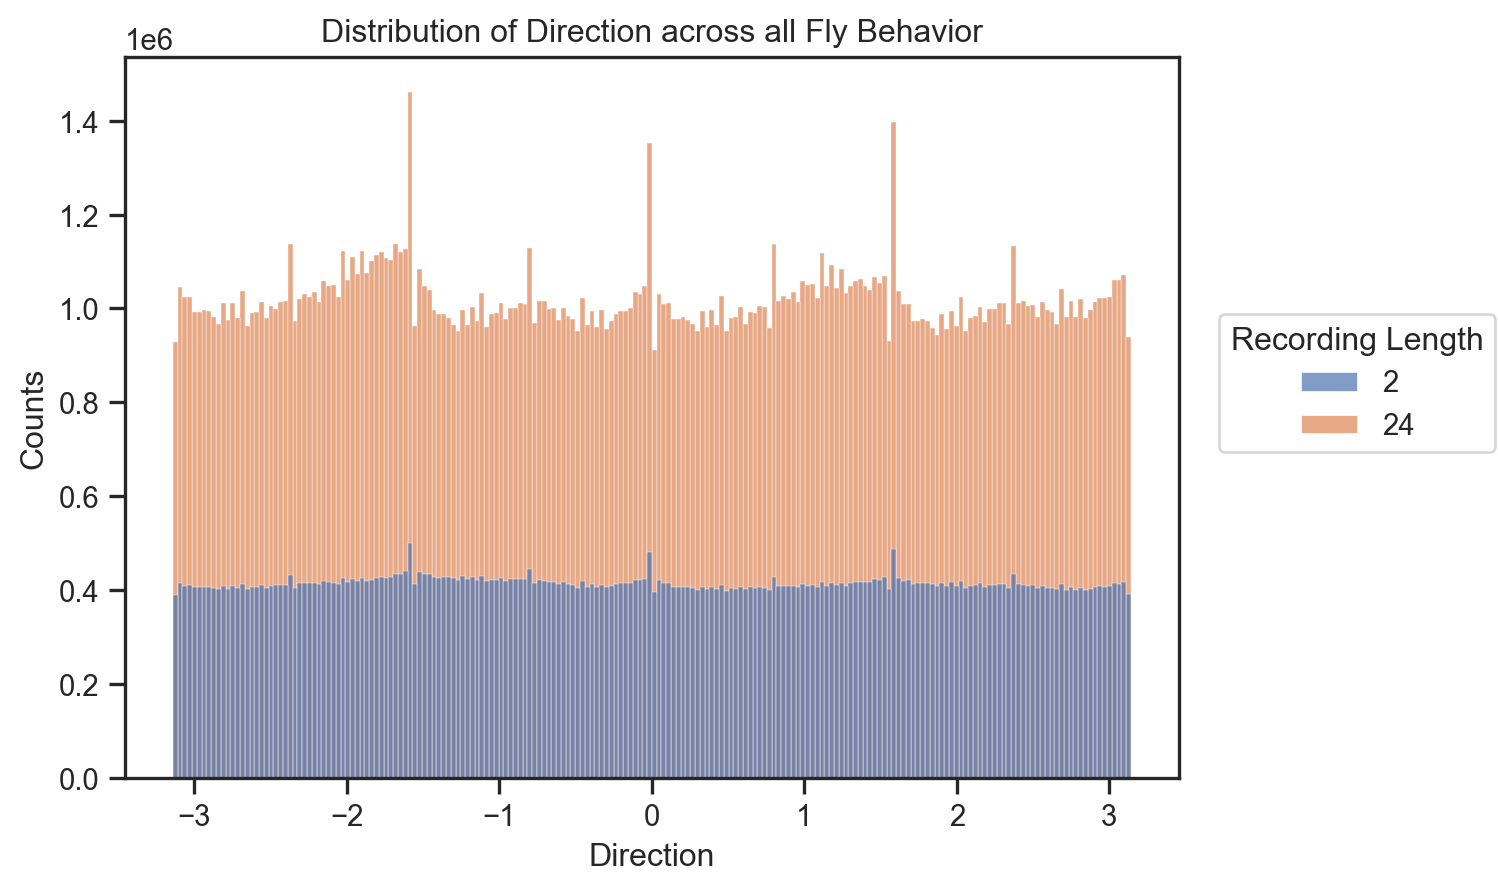

In [13]:
lcm.makehistogram(summary_both, "direction")

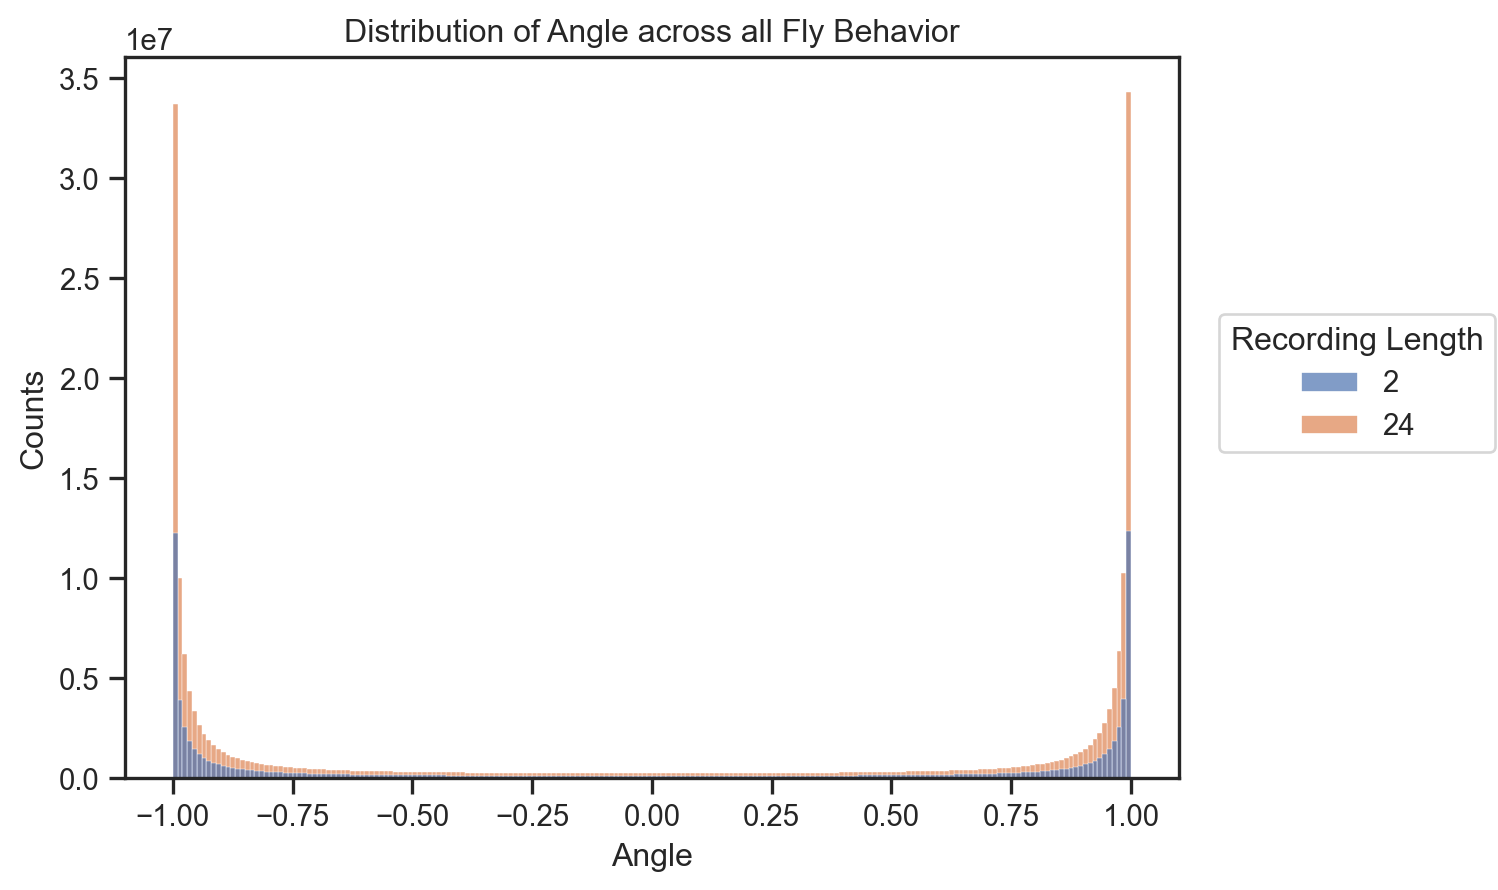

In [49]:
ahist=lcm.makehistogram(summary_both, "angle")
ahist.save("angle_hist.pdf")


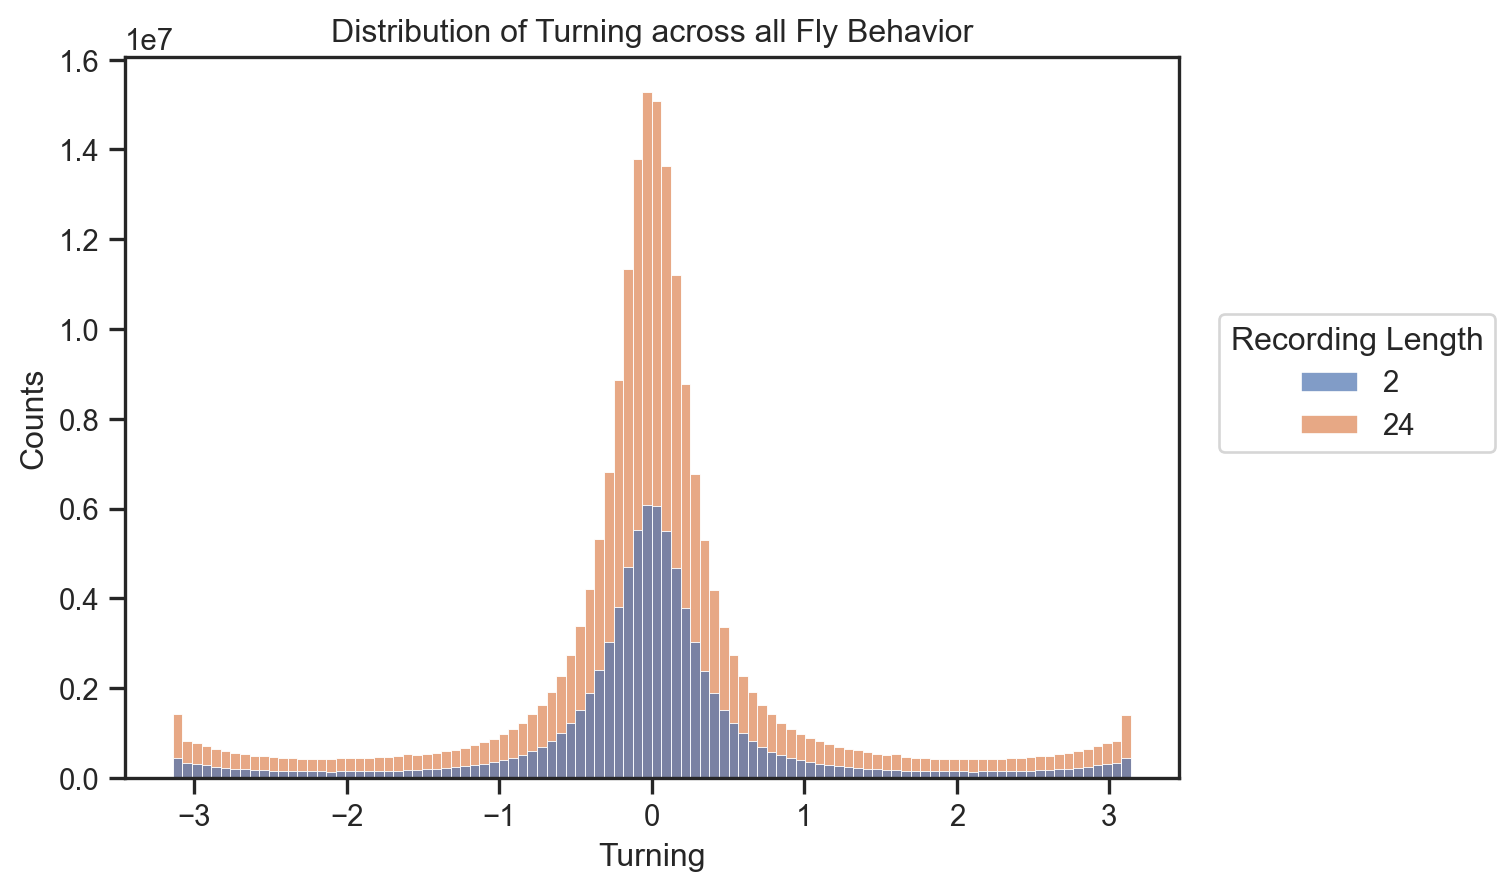

In [50]:
turnhist=lcm.makehistogram(summary_both, "turning")
turnhist.save("turning_hist.pdf")

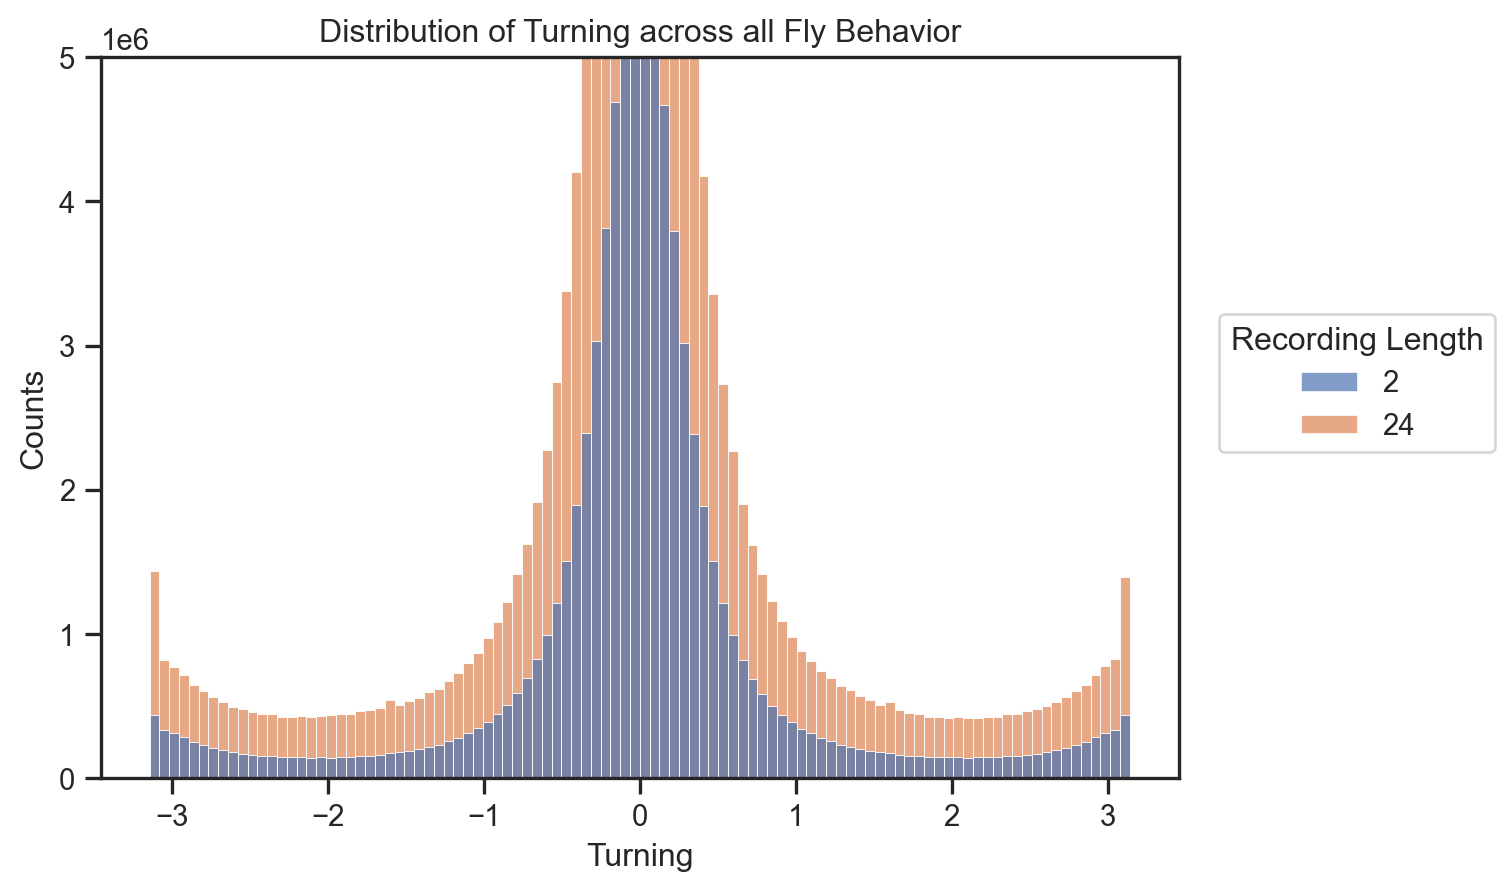

In [16]:
a.limit(y=(0,5*10**6))

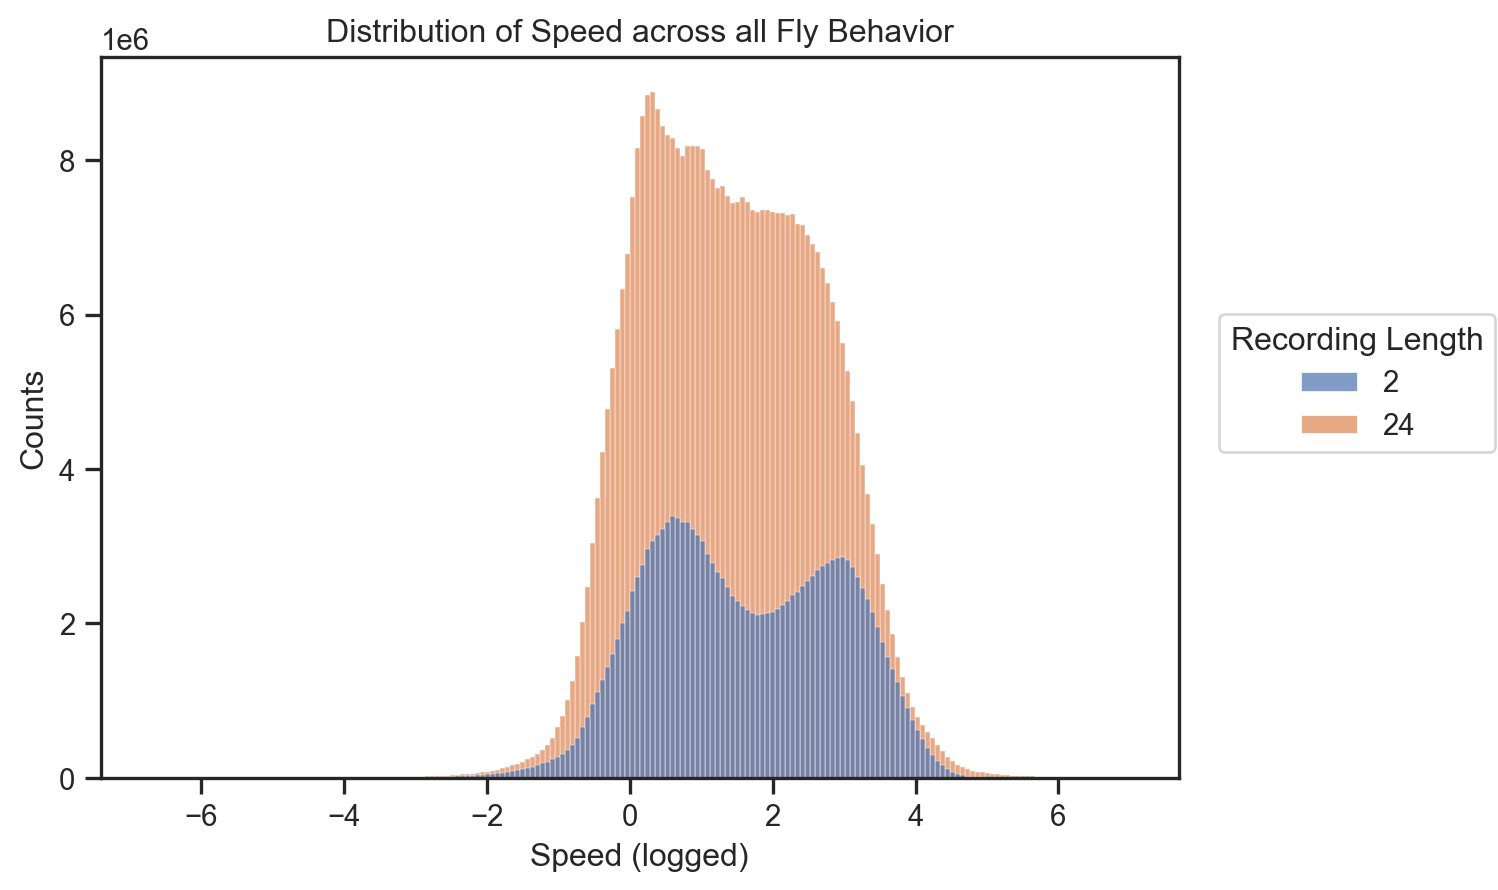

In [51]:
speed_hist=lcm.makehistogram(summary_both, "speed_logged", xlabel="Speed (logged)", title="Distribution of Speed across all Fly Behavior")
speed_hist.save("speed_hist.pdf")

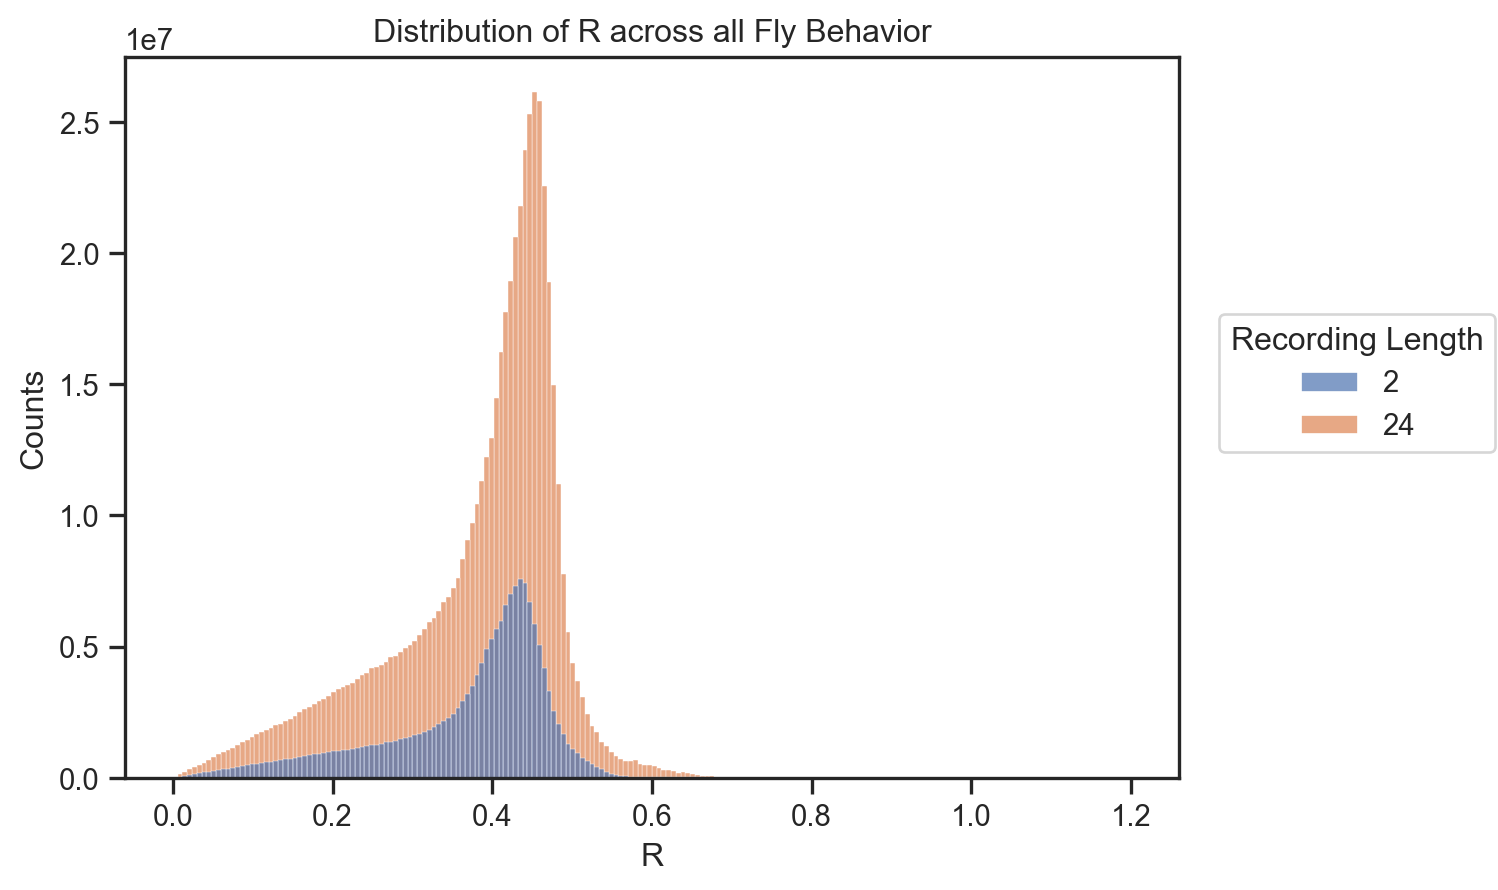

In [52]:
r_hist=lcm.makehistogram(summary_both, "r")
r_hist.save("r_hist.pdf")

# PSDs for all measures

In [27]:
summary_both

<xarray.Dataset>
Dimensions:               (Bins_direction: 200, Freq: 1000, Shuffled: 2,
                           Bins_angle: 200, Bins_theta: 200, Measure: 4,
                           Bins_turning: 200, Bins_speed_logged: 200,
                           Bins_r: 200, flyid: 252, recording_length: 2)
Coordinates: (12/14)
  * Bins_direction        (Bins_direction) float64 -3.126 -3.094 ... 3.094 3.126
  * Freq                  (Freq) float64 3.858e-07 3.922e-07 ... 4.919 5.0
  * Shuffled              (Shuffled) object 'Non-shuffled Data' 'Shuffled'
  * Bins_angle            (Bins_angle) float64 -0.995 -0.985 ... 0.985 0.995
  * Bins_theta            (Bins_theta) float64 -3.126 -3.094 ... 3.094 3.126
  * Measure               (Measure) object 'Mean' 'Std' 'Min' 'Max'
    ...                    ...
  * Bins_r                (Bins_r) float64 0.003 0.009 0.015 ... 1.191 1.197
  * flyid                 (flyid) object MultiIndex
  * Batch                 (flyid) int64 1 1 1 1 1 1 1 1 1 ... 6 6 6 6 6 6 6 6 6
  * Fly                   (flyid) int64 1 2 3 4 5 6 7 8 ... 36 37 38 39 40 41 42
    Trial                 int8 1
  * recording_length      (recording_length) int8 2 24
Data variables: (12/19)
    direction_bins        (recording_length, Bins_direction, flyid) float64 dask.array<chunksize=(1, 200, 1), meta=np.ndarray>
    direction_psd         (recording_length, Freq, Shuffled, flyid) float64 dask.array<chunksize=(1, 1000, 2, 1), meta=np.ndarray>
    angle_bins            (recording_length, Bins_angle, flyid) float64 dask.array<chunksize=(1, 200, 1), meta=np.ndarray>
    angle_psd             (recording_length, Freq, Shuffled, flyid) float64 dask.array<chunksize=(1, 1000, 2, 1), meta=np.ndarray>
    theta_bins            (recording_length, Bins_theta, flyid) float64 dask.array<chunksize=(1, 200, 1), meta=np.ndarray>
    theta_summary         (recording_length, Measure, flyid) float64 dask.array<chunksize=(1, 4, 1), meta=np.ndarray>
    ...                    ...
    r_bins                (recording_length, Bins_r, flyid) float64 dask.array<chunksize=(1, 200, 1), meta=np.ndarray>
    r_psd                 (recording_length, Freq, Shuffled, flyid) float64 dask.array<chunksize=(1, 1000, 2, 1), meta=np.ndarray>
    r_summary             (recording_length, Measure, flyid) float64 dask.array<chunksize=(1, 4, 1), meta=np.ndarray>
    direction_summary     (recording_length, Measure, flyid) float64 dask.array<chunksize=(1, 4, 1), meta=np.ndarray>
    speed_summary         (recording_length, Measure, flyid) float64 dask.array<chunksize=(1, 4, 1), meta=np.ndarray>
    angle_summary         (recording_length, Measure, flyid) float64 dask.array<chunksize=(1, 4, 1), meta=np.ndarray>

In [23]:
turning_psd=summary_both["turning_psd"]
turning_psd

<xarray.DataArray 'turning_psd' (recording_length: 2, Freq: 1000, Shuffled: 2,
                                 flyid: 252)>
dask.array<concatenate, shape=(2, 1000, 2, 252), dtype=float64, chunksize=(1, 1000, 2, 1), chunktype=numpy.ndarray>
Coordinates:
  * Freq              (Freq) float64 3.858e-07 3.922e-07 3.987e-07 ... 4.919 5.0
  * Shuffled          (Shuffled) object 'Non-shuffled Data' 'Shuffled'
  * flyid             (flyid) object MultiIndex
  * Batch             (flyid) int64 1 1 1 1 1 1 1 1 1 1 ... 6 6 6 6 6 6 6 6 6 6
  * Fly               (flyid) int64 1 2 3 4 5 6 7 8 ... 35 36 37 38 39 40 41 42
    Trial             int8 1
  * recording_length  (recording_length) int8 2 24

In [24]:
turning_psd_df=turning_psd.to_dataframe()
turning_psd_df

Batch  Fly  Trial  \
recording_length Freq         Shuffled          Batch Fly                      
2                3.858025e-07 Non-shuffled Data 1     1        1    1      1   
                                                      2        1    2      1   
                                                      3        1    3      1   
                                                      4        1    4      1   
                                                      5        1    5      1   
...                                                          ...  ...    ...   
24               5.000000e+00 Shuffled          6     38       6   38      1   
                                                      39       6   39      1   
                                                      40       6   40      1   
                                                      41       6   41      1   
                                                      42       6   42      1   

                                                            turning_psd  
recording_length Freq         Shuffled          Batch Fly                
2                3.858025e-07 Non-shuffled Data 1     1    1.594373e-04  
                                                      2    9.695770e-05  
                                                      3    8.558960e-05  
                                                      4    7.330665e-05  
                                                      5    2.668082e-05  
...                                                                 ...  
24               5.000000e+00 Shuffled          6     38   1.091414e-06  
                                                      39   3.733601e-06  
                                                      40   5.535780e-07  
                                                      41   1.373228e-05  
                                                      42   1.452333e-05  

[1008000 rows x 4 columns]

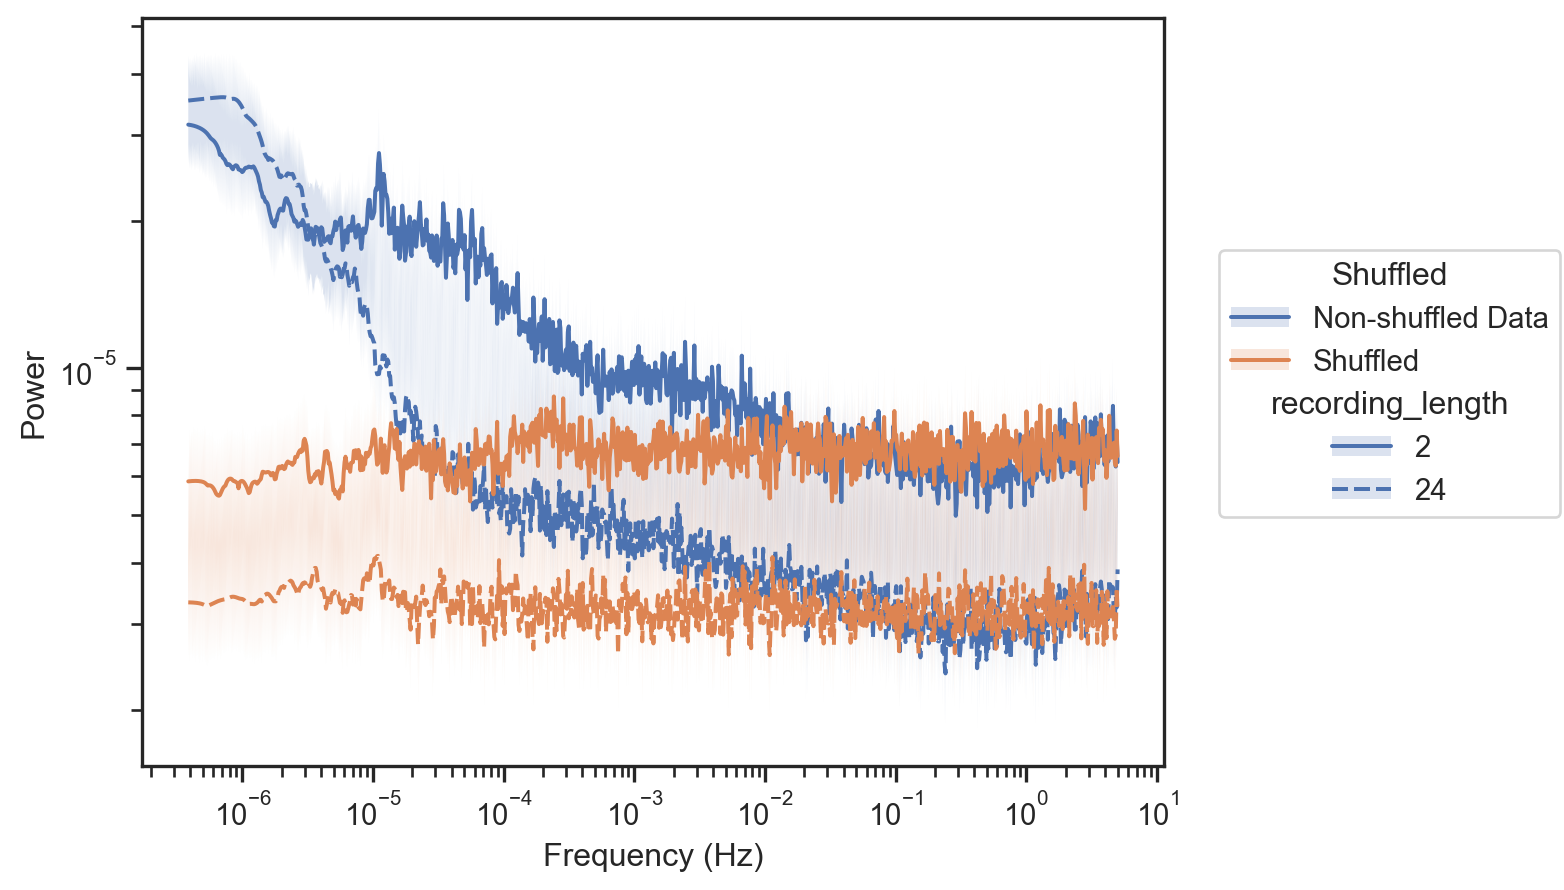

In [26]:
a=so.Plot(data=turning_psd_df.dropna(), x="Freq", y="turning_psd", color="Shuffled", linestyle="recording_length").add(so.Line(), so.Agg()).scale(x="log", y="log").add(so.Band(), so.Est()).theme({**axes_style("ticks"), "grid.linestyle": ":"}).label(x="Frequency (Hz)", y="Power")
a

In [38]:
# repeat for all other PSDs
speed_psd=summary_both["speed_psd"]
speed_psd_df=speed_psd.to_dataframe()
#drop batch and fly columns
speed_psd_df=speed_psd_df.drop(columns=["Batch", "Fly"]).reset_index().dropna()
speed_psd_df["recording_length"]=speed_psd_df["recording_length"].astype(str)
# speed_psd_df.drop
speed_psd_df

recording_length          Freq           Shuffled  Batch  Fly  Trial  \
0                      2  3.858025e-07  Non-shuffled Data      1    1      1   
1                      2  3.858025e-07  Non-shuffled Data      1    2      1   
2                      2  3.858025e-07  Non-shuffled Data      1    3      1   
3                      2  3.858025e-07  Non-shuffled Data      1    4      1   
4                      2  3.858025e-07  Non-shuffled Data      1    5      1   
...                  ...           ...                ...    ...  ...    ...   
1007995               24  5.000000e+00           Shuffled      6   38      1   
1007996               24  5.000000e+00           Shuffled      6   39      1   
1007997               24  5.000000e+00           Shuffled      6   40      1   
1007998               24  5.000000e+00           Shuffled      6   41      1   
1007999               24  5.000000e+00           Shuffled      6   42      1   

            speed_psd  
0        4.177945e-02  
1        3.941180e-02  
2        4.859670e-03  
3        2.332019e-02  
4        1.508095e-02  
...               ...  
1007995  1.991003e-08  
1007996  3.298466e-07  
1007997  6.887603e-07  
1007998  3.962093e-07  
1007999  1.130525e-06  

[1002000 rows x 7 columns]

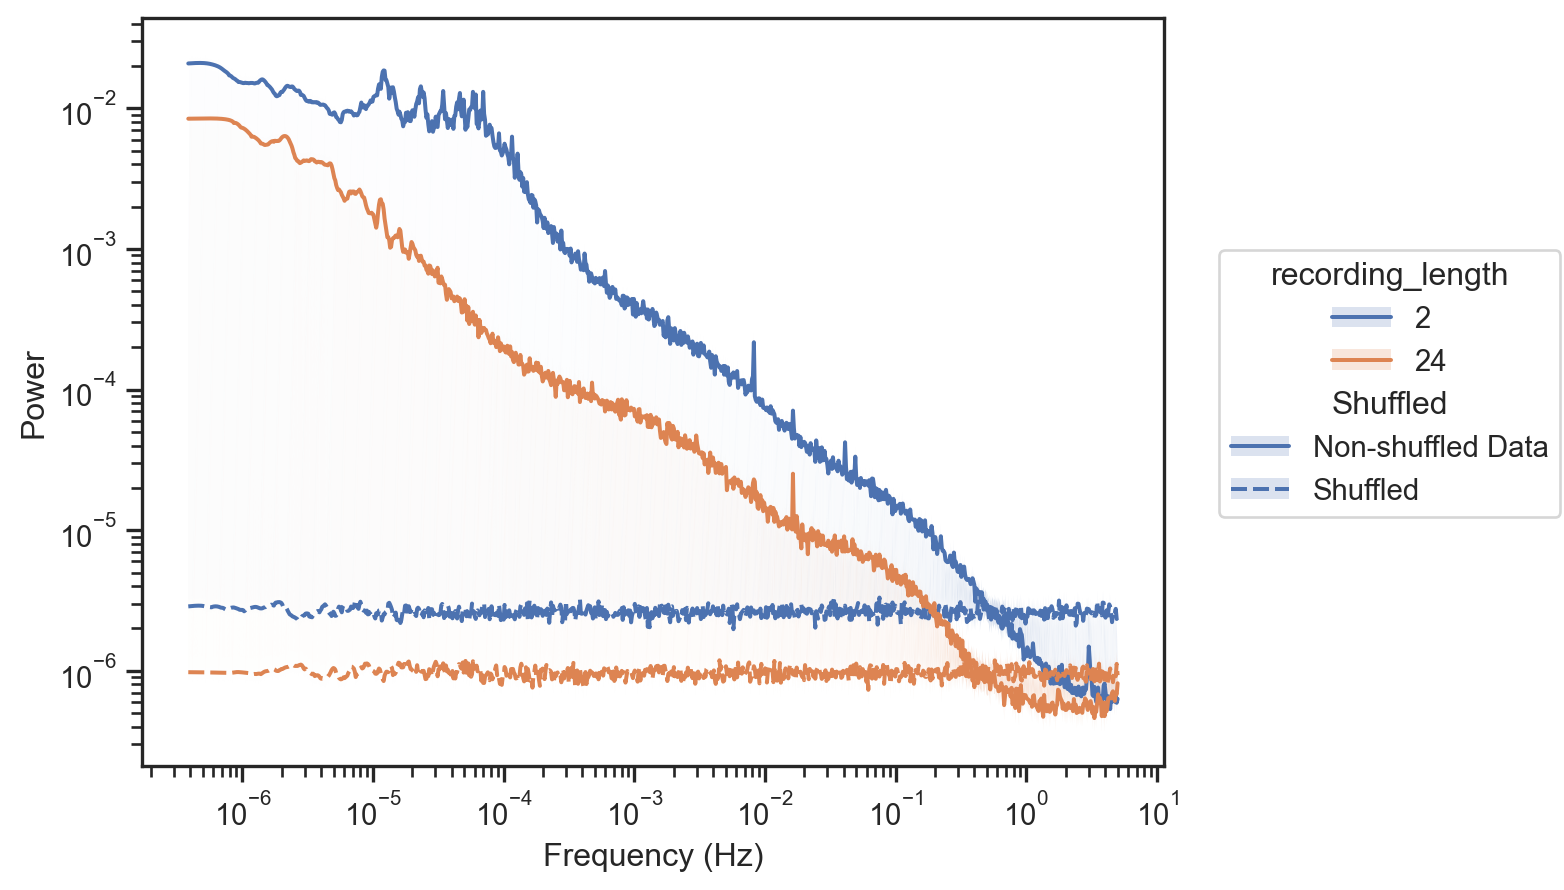

In [41]:

speed_psd_df["case"]=speed_psd_df["recording_length"].astype(str)+" hr recordings "+speed_psd_df["Shuffled"]
a=so.Plot(data=speed_psd_df.dropna(), x="Freq", y="speed_psd", color="recording_length", linestyle="Shuffled").add(so.Line(), so.Agg()).scale(x="log", y="log").add(so.Band(), so.Est()).theme({**axes_style("ticks"), "grid.linestyle": ":"}).label(x="Frequency (Hz)", y="Power")
a

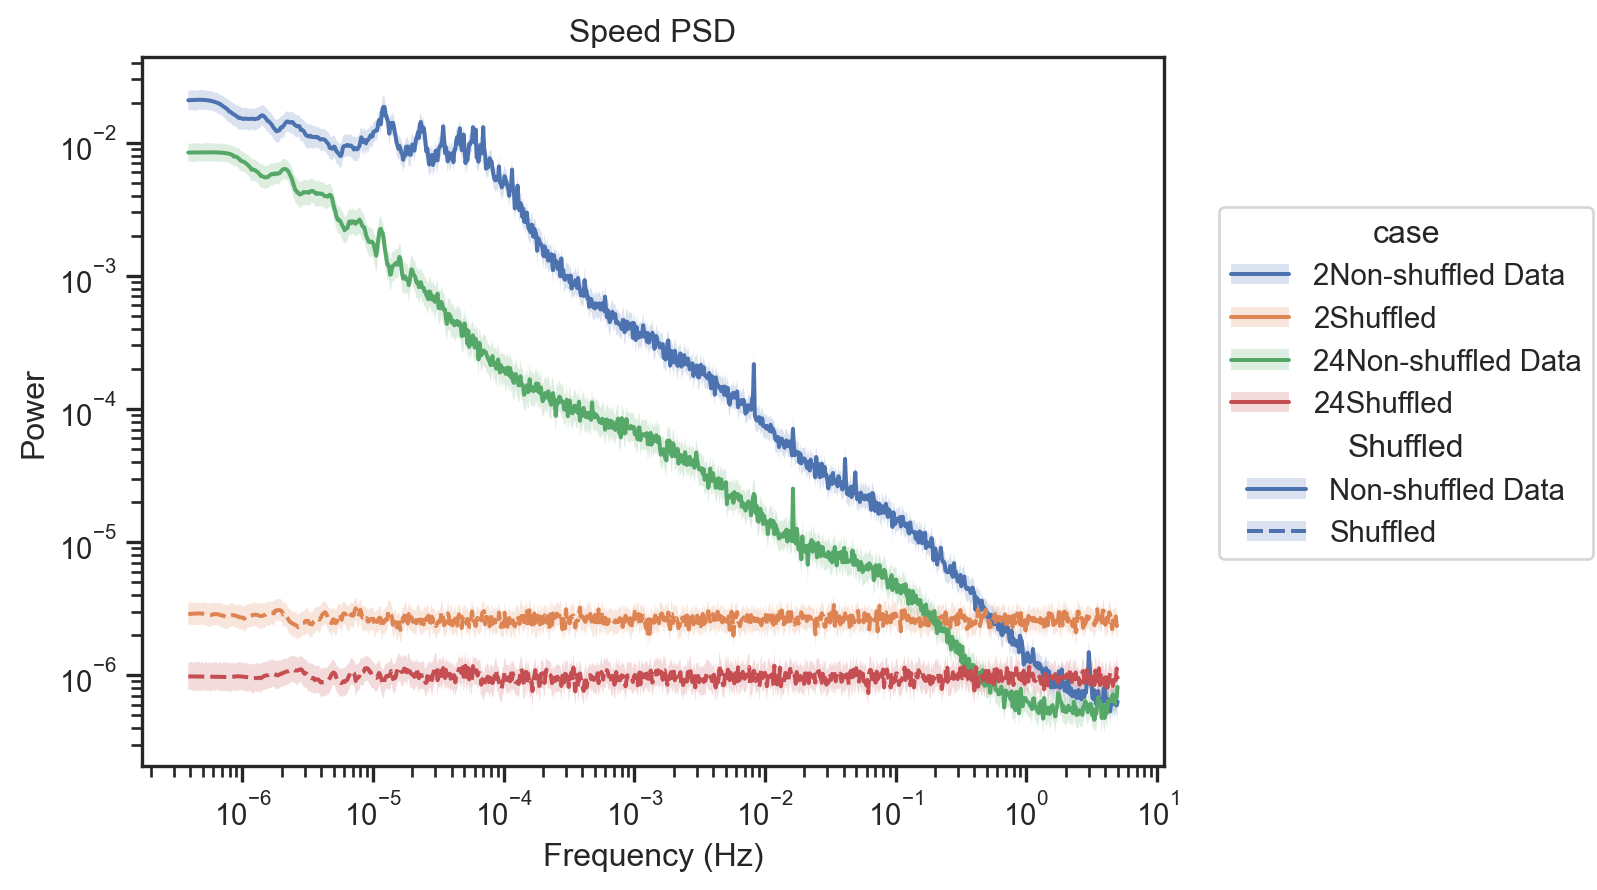

In [44]:

speed_psd_df["case"]=speed_psd_df["recording_length"].astype(str)+speed_psd_df["Shuffled"]
a=so.Plot(data=speed_psd_df.dropna(), x="Freq", y="speed_psd", color="case", linestyle="Shuffled").add(so.Line(), so.Agg()).scale(x="log", y="log").add(so.Band(), so.Est()).theme({**axes_style("ticks"), "grid.linestyle": ":"}).label(x="Frequency (Hz)", y="Power")
#add title
a.label(title="Speed PSD")

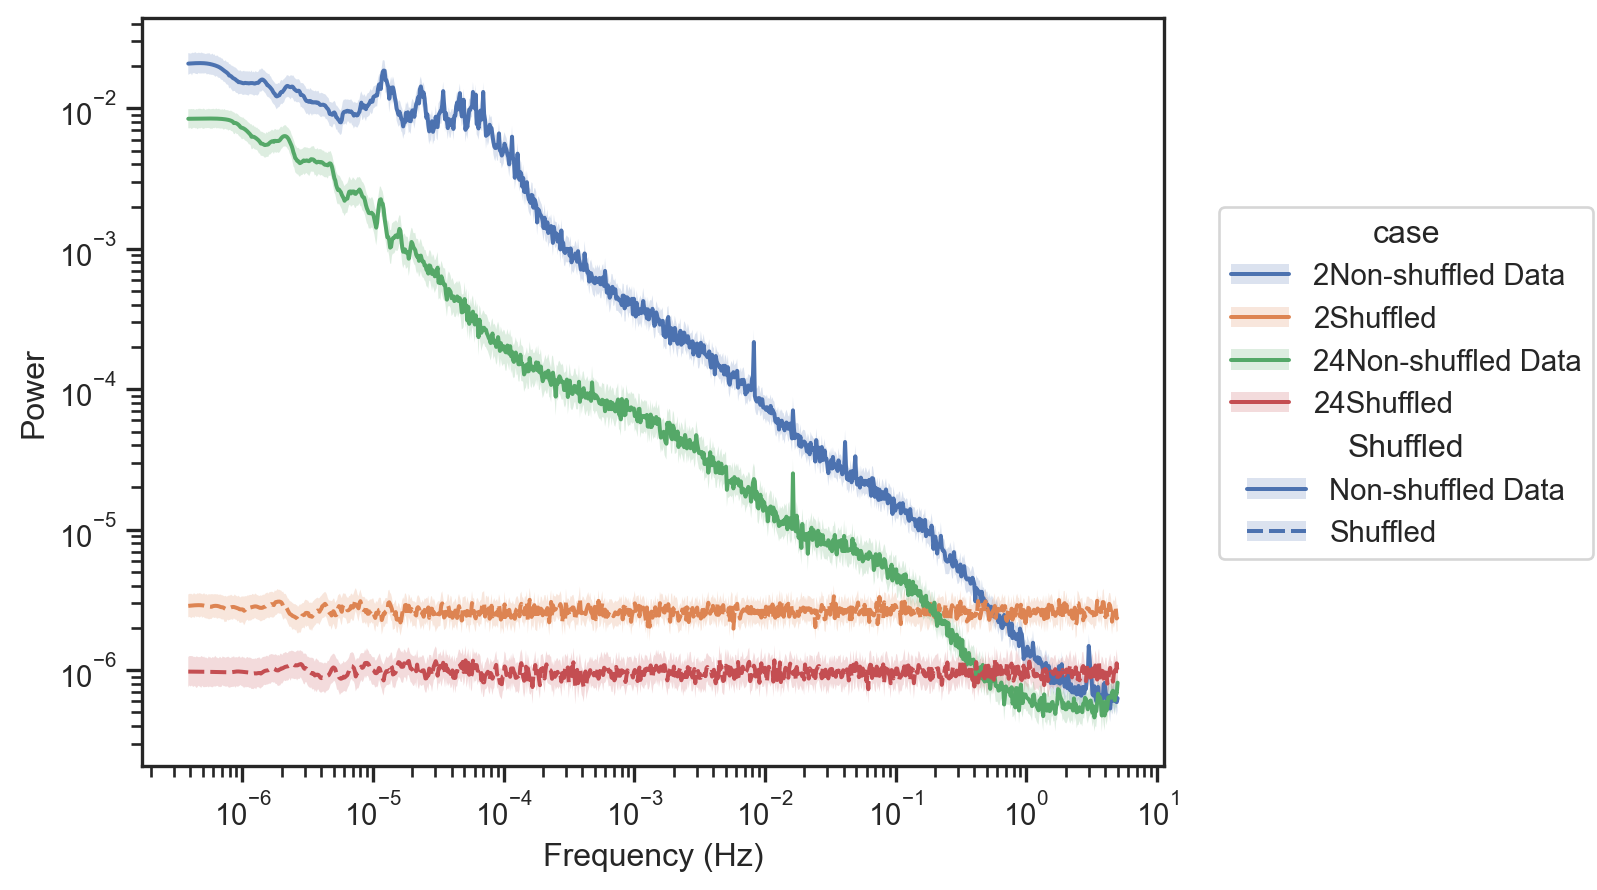

In [45]:
a.save("Speed PSD.pdf")

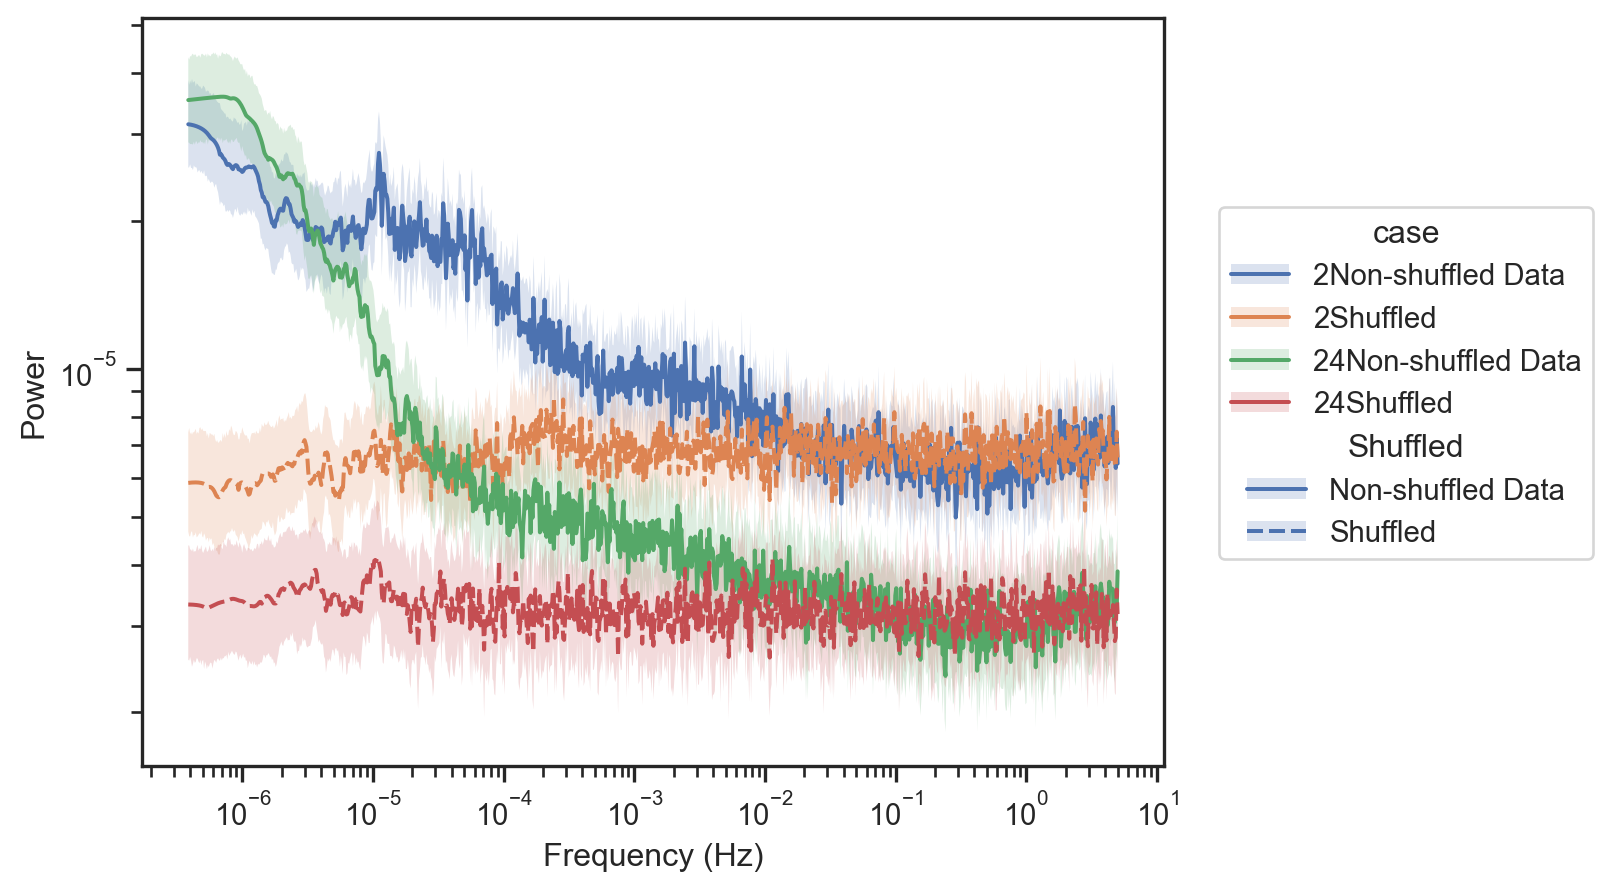

In [46]:
# repeat for turning
turning_psd=summary_both["turning_psd"]
turning_psd_df=turning_psd.to_dataframe()
turning_psd_df=turning_psd_df.drop(columns=["Batch", "Fly"]).reset_index().dropna()
turning_psd_df["recording_length"]=turning_psd_df["recording_length"].astype(str)
turning_psd_df["case"]=turning_psd_df["recording_length"].astype(str)+turning_psd_df["Shuffled"]
turning_psd_plot=so.Plot(data=turning_psd_df.dropna(), x="Freq", y="turning_psd", color="case", linestyle="Shuffled").add(so.Line(), so.Agg()).scale(x="log", y="log").add(so.Band(), so.Est()).theme({**axes_style("ticks"), "grid.linestyle": ":"}).label(x="Frequency (Hz)", y="Power")
turning_psd_plot.label(title="Turning PSD")
turning_psd_plot.save("Turning PSD.pdf")

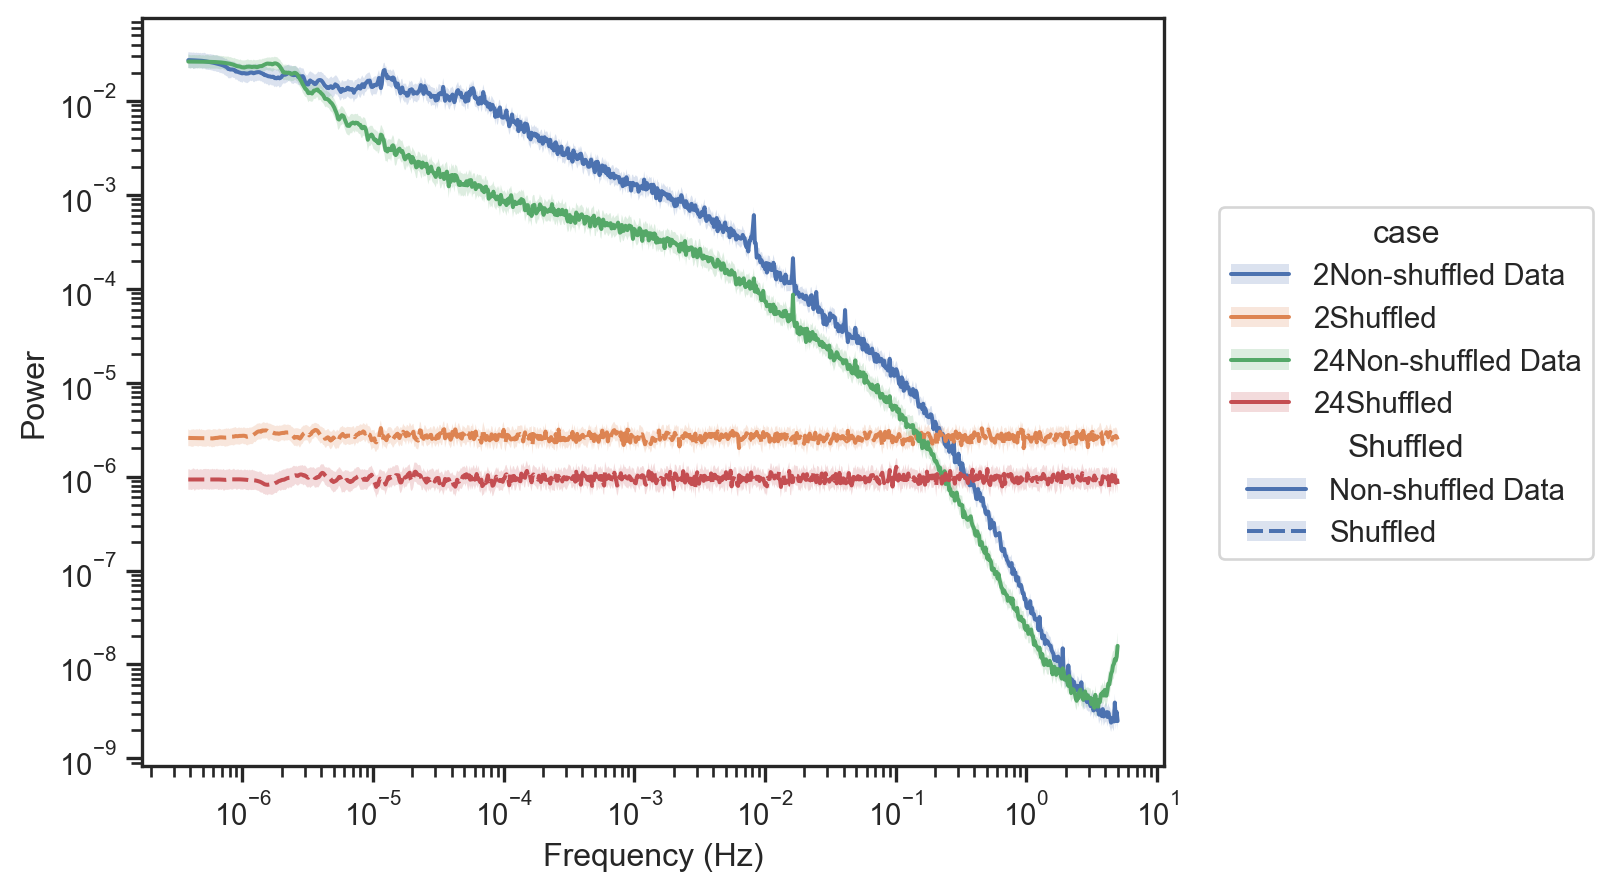

In [47]:
#repeat for r
r_psd=summary_both["r_psd"]
r_psd_df=r_psd.to_dataframe()
r_psd_df=r_psd_df.drop(columns=["Batch", "Fly"]).reset_index().dropna()
r_psd_df["recording_length"]=r_psd_df["recording_length"].astype(str)
r_psd_df["case"]=r_psd_df["recording_length"].astype(str)+r_psd_df["Shuffled"]
r_psd_plot=so.Plot(data=r_psd_df.dropna(), x="Freq", y="r_psd", color="case", linestyle="Shuffled").add(so.Line(), so.Agg()).scale(x="log", y="log").add(so.Band(), so.Est()).theme({**axes_style("ticks"), "grid.linestyle": ":"}).label(x="Frequency (Hz)", y="Power")
r_psd_plot.label(title="R PSD")
r_psd_plot.save("R PSD.pdf")

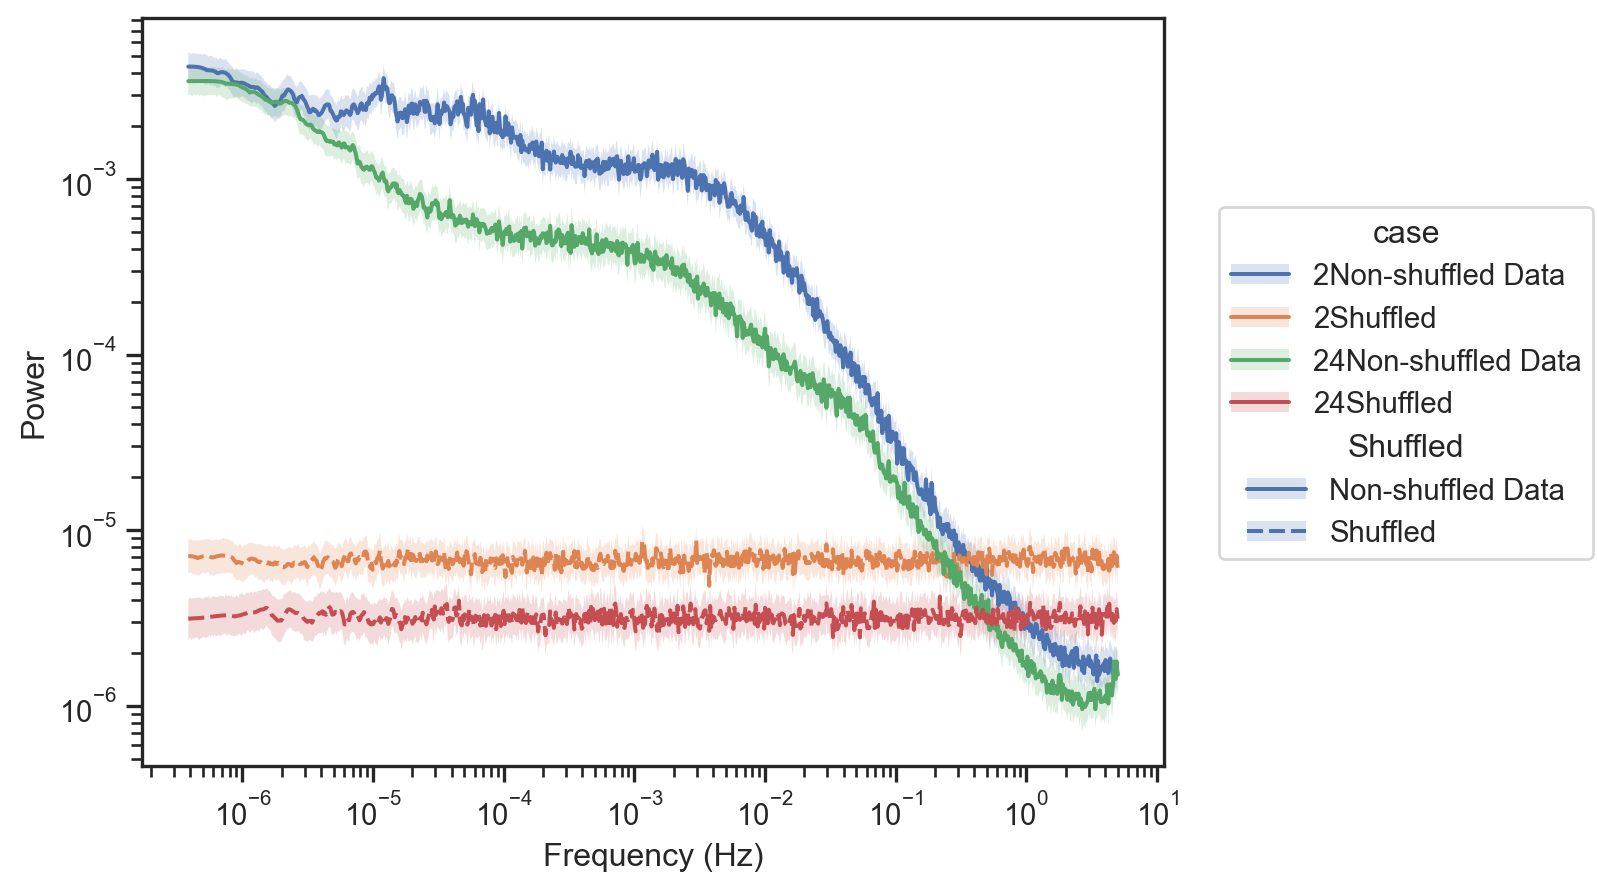

In [48]:
#repeat for angle
angle_psd=summary_both["angle_psd"]
angle_psd_df=angle_psd.to_dataframe()
angle_psd_df=angle_psd_df.drop(columns=["Batch", "Fly"]).reset_index().dropna()
angle_psd_df["recording_length"]=angle_psd_df["recording_length"].astype(str)
angle_psd_df["case"]=angle_psd_df["recording_length"].astype(str)+angle_psd_df["Shuffled"]
angle_psd_plot=so.Plot(data=angle_psd_df.dropna(), x="Freq", y="angle_psd", color="case", linestyle="Shuffled").add(so.Line(), so.Agg()).scale(x="log", y="log").add(so.Band(), so.Est()).theme({**axes_style("ticks"), "grid.linestyle": ":"}).label(x="Frequency (Hz)", y="Power")
angle_psd_plot.label(title="Angle PSD")
angle_psd_plot.save("Angle PSD.pdf")

# Plot individual means for each fly

In [ ]:
summary_both

In [ ]:
# t2s=test2.sortby("Fly").expand_dims("Batch").stack(flyid=["Batch", "Fly"])

In [ ]:
# t1s=test1.sortby("Fly").expand_dims("Batch").stack(flyid=["Batch", "Fly"])

In [ ]:
# t1cd=t1c.to_dask_dataframe()
# t1cd

In [ ]:
# t1cd.map_blocks(sparse.COO)

In [ ]:
# t1cs=t1c.map_blocks(sparse.COO)

In [ ]:
# t1c=xr.concat([t1s, t2s], dim="flyid")

In [ ]:
# t1c.groupby("flyid").mean(...)

In [ ]:
# xr.concat()

In [ ]:
# testkey=test1.stack(flyid=["Batch", "Fly"])

In [ ]:
nestedlist_batch=[]
batch=1
# nestedlist_batch.append(glob.glob("CirclingData_2h_B"+str(batch)+"_F*.nc"))
test1=xr.open_mfdataset(nestedlist_batch[:3], combine="nested", concat_dim=["Batch"])

for batch in np.arange(2,7):
  nestedlist_batch=[]
  nestedlist_batch.append(glob.glob("CirclingData_2h_B"+str(batch)+"_F*.nc"))
  test2=xr.open_mfdataset(nestedlist_batch, combine="nested", concat_dim=["Batch"])
  test1=xr.concat([test1,test2], dim="Batch")

In [ ]:
# test1

In [ ]:
# import dask

In [ ]:
# dask.config.set({"array.slicing.split_large_chunks": False})

In [ ]:
# DS_2h_stacked=test1.stack(flykey=["Fly", "Batch"])
DS_2h_stacked

# Calculate the by fly mean for all parameters

In [ ]:
DS_2h_stacked_mean=DS_2h_stacked.groupby("flykey").mean(...)

In [ ]:
# ditto std
DS_2h_stacked_std=DS_2h_stacked.groupby("flykey").std(...)

# Calculate histograms of global averages

In [ ]:
speedplot=np.log(test1["speed"]).plot.hist(bins=np.arange(-7,7,.1))
speedplot

In [ ]:
angleplot=test1["angle"].plot.hist(bins=np.arange(-3.5,3.5,.1))
angleplot

In [ ]:
turnplot=test1["turning"].plot.hist(bins=np.arange(-7,7,.1))
turnplot

# Calculate PSDs and lowpass filter each fly data

In [ ]:
test1["turning"].groupby(["Fly, Batch"]).mean()

In [ ]:
tc=testcombined.stack(flyindex=["Batch", "Fly"])
tc

In [ ]:
tcm=tc.groupby("flyindex").mean(...)
tcm

In [ ]:
tcm['speed'].values

In [ ]:
np.log(testcombined['speed']).plot.hist(bins=np.arange(-7,7,.1))

In [ ]:
nestedlist_batch=[]
for batch in np.arange(1,4):
  # nestedlist_fly=[]
  # for fly in np.arange(1,43):
    nestedlist_batch.append(glob.glob("CirclingData_2h_B"+str(batch)+"_F[0-5].nc"))
  # nestedlist_batch.append(nestedlist_fly)


In [ ]:
nestedlist_batch

In [ ]:
# Too many dims here

# nestedlist_batch=[]
# for batch in np.arange(1,9):
#   # nestedlist_fly=[]
#   for fly in np.arange(1,43):
#     nestedlist_fly.append(glob.glob("CirclingData_2h_B"+str(batch)+"_F"+str(fly)+".nc"))
#   nestedlist_batch.append(nestedlist_fly)

# # nestedlist_batch


In [ ]:
nestedlist_batch[1]

In [ ]:
nestedlist_batch[0:2]

In [ ]:
nestedlist_batch

In [ ]:
test0=xr.open_mfdataset(nestedlist_batch[:3], combine="nested", concat_dim=["Batch", "Fly"])


In [ ]:
test1=xr.open_mfdataset(nestedlist_batch[0:2], combine="nested", concat_dim=["Batch", "Fly"])
test1["speed"].plot.

In [ ]:
np.log(test1["speed"]).plot.hist(bins=np.arange(-7,7,.1))

In [ ]:
n=xr.open_mfdataset(nestedlist_batch, combine="nested",concat_dim=["Batch", "Fly"])
n

In [ ]:
n

In [ ]:
a=xr.open_mfdataset("CirclingData_2h_B1_F*.nc", combine="nested",concat_dim="Fly")
a

In [ ]:
s=xr.open_mfdataset("CirclingData_2h_B1_F[1-3].nc", combine="nested",concat_dim="Fly")
s

In [ ]:
alog=np.log(a["speed"])
alog

In [ ]:
alog.plot.hist(bins=np.arange(-10,10,.1))

In [ ]:
np.log(a["speed"]).plot.hist()

In [ ]:
np.log(a["speed"]).plot()

In [ ]:
xr.open_mfdataset()

In [ ]:
np.log(a["speed"])

In [ ]:
a["angle"]

In [ ]:
imp.reload(lcm)
p=lcm.calculatepowerall(a)

In [ ]:
p=_

In [ ]:
px.imshow(p.squeeze(), x="Freq", y="Fly")

In [ ]:
px.line(data_frame=p.squeeze(), x="Freq")

In [ ]:
p

In [ ]:
a

In [ ]:
sns.histplot(a["angle"])

In [ ]:
a

In [ ]:
a["Fly"]

In [ ]:
imp.reload(lcm)
lcm.calculatepowerall(a["angle"])

In [ ]:
imp.reload(lcm)
lcm.calculatepowerforonefly(.2, a, 0)

In [ ]:
a["angle"][0,:]

# Load summary data from all flies

In [ ]:
pwd

In [ ]:
filelist=glob.glob("Circling_Summary*")
# filelist

In [ ]:
xrall=xr.open_mfdataset(filelist[:], coords='minimal', compat='override')
xrall

In [ ]:
bins=xr.open_dataset(filelist[0])["turning_bins"]
bins

In [ ]:
xrall_s=xrall.stack({"flyid":["Fly", "Batch"]})
xrall_s

In [22]:
#plot the turning_psd as a function of frequency using seaborn.objects
#get xrall_s into a pandas dataframe
turning_psd=xrall_s["turning_psd"]
turning_psd

NameError: name 'xrall_s' is not defined

In [ ]:
turning_psd_df=turning_psd.to_dataframe()
turning_psd_df

In [ ]:
PSD_plot_24h=so.Plot(data=turning_psd_df, x="Freq", y="turning_psd", color="Shuffled").add(so.Line(), so.Agg()).scale(x="log", y="log").add(so.Band(), so.Est()).theme({**axes_style("ticks"), "grid.linestyle": ":"}).label(x="Frequency (Hz)", y="Power")


In [ ]:
PSD_plot_24h.save("F1C_PSD_24h.pdf")


In [ ]:
testturning=xr.open_mfdataset("CirclingData_2h_B1_F11.nc*")
a=testturning["turning"].plot.hist()
a[0]

In [ ]:
xrall_s["turning_bins"].values

In [ ]:
sns.heatmap(xrall_s["turning_bins"])

In [ ]:
lcm.makehistogram(xrall, "direction")

In [ ]:
lcm.makehistogram(xrall_s, "turning")

In [ ]:
imp.reload(lcm)
df=lcm.makehistogram(xrall_s, "turning")
df

In [ ]:
xrall=xr.open_mfdataset(filelist[0:5], concat_dim=["Batch"], combine='nested')
xrall

In [ ]:
xrall["direction_bins"]

# Combine data from multiple flies to get global histograms
This is to process all the data at once

In [ ]:
asdf

# Brief interlude: estimating mean via meboot
The goal of this is to do bootstrapping sensitive to dependencies in data

In [ ]:
glob.glob('meboot.py')

In [ ]:
from meboot import meboot

## Step 1: Get 1 time series

In [ ]:
rawdata=glob.glob("CirclingData_24h*")
rawdata[0]

In [ ]:
testdata=xr.open_dataset(rawdata[0])
testdata['speed'].squeeze().to_series()

In [ ]:
test_series=testdata['speed'].squeeze().to_series().dropna()
test_series

In [ ]:
replicates=meboot(test_series.iloc[0:10000], num_replicates=9999)
ping(h)
replicates

In [ ]:
replicates

In [ ]:
rmelt=replicates.iloc[:,:].melt(var_name="Replicate", ignore_index=False)
rmelt.reset_index()

In [ ]:
sns.lineplot(rmelt, x="timestamps", y="value", errorbar="pi")

In [ ]:
replicates.iloc[0:100,:]

I'm pretty sure this method is, to first approximation, useless. As I understand it, it is a way of applying noise that matches the distribution of values, but the time series aspect of it is completely dumb and completely apes the original order

In [ ]:
testseries.mean()

In [ ]:
ping(h)

# BOUTS BOUTS BOUT
The best method I can think of to handle dependencies in time is to break thinks into bouts rather than frames, which can at least eliminate the mechanical dependencies of a behavior into on epart

In [ ]:
rawdata=glob.glob("CirclingData_24h*")
rawdata[0]
testdata=xr.open_dataset(rawdata[0])
testdata

In [ ]:

testdata['speed'].squeeze().to_series()
test_series=testdata['speed'].squeeze().to_series().dropna()
test_series
test_angle_series=testdata['angle'].squeeze().to_series().dropna()
test_r_series=testdata['r'].squeeze().to_series().dropna()
test_turning_series=testdata['turning'].squeeze().to_series().dropna()


In [ ]:
test_turning_series

In [ ]:
test_series_trunc=test_series.iloc[700:900]
test_series_trunc

In [ ]:

#calculate bouts
bouts=(((np.log(test_series_trunc)>.5).rolling(10, center=True).sum())>1)
boutnumber=((np.round(bouts).diff())>0).cumsum()
groups=boutnumber*bouts
plt.plot((np.round(bouts).diff())>0)
plt.plot(boutnumber*bouts)
plt.plot(test_series_trunc)

testseries_

In [ ]:
test_series_trunc.groupby(groups).mean()

In [ ]:
bouts

In [ ]:

# groups=(np.log(test_series_trunc)>.5).diff().cumsum()


groups=(((np.log(test_series)>.5).rolling(10, center=True).sum())>1).diff().cumsum()
# groups.plot()
plt.plot(groups+.5)
plt.plot(bouts)

plt.plot((np.log(test_series_trunc)>.5)-.5)
# plt.plot(np.log(test_series_trunc))

In [ ]:
# groups=((np.log(test_series)>.5).rolling(10).sum()>8).diff().cumsum()

In [ ]:
# groups=(((np.log(test_series)>.5).diff())>0).cumsum()
groups=(((np.log(test_series)>.5).rolling(10, center=True).sum())>1).diff().cumsum()


In [ ]:
chunkmeans=test_angle_series.groupby(groups).mean()
plt.hist(chunkmeans,np.linspace(-1,1,101))
plt.show()

In [ ]:
test_turning_series.reset_index()

In [ ]:
groups

In [ ]:
test_turning_series

In [ ]:
test_series.reset_index().groupby(np.array(groups), axis=0).mean(numeric_only=False)

In [ ]:
test_turning_series.reset_index()['timestamps'].groupby(groups, axis=0).mean(numeric_only=False)

In [ ]:
chunkmeans=test_turning_series.groupby(groups).mean()
plt.hist(chunkmeans,np.linspace(-7,7,101))
plt.show()

In [ ]:
# test_turning_series.groupby(groups).length()

In [ ]:
test_turning_series.groupby(groups).count()

In [ ]:
plt.hist(test_turning_series.groupby(groups).count())

In [ ]:
chunkmeans

In [ ]:
bouts.values.shape

In [ ]:
test_turning_series.values.shape

In [ ]:
np.log(test_series)>.5

In [ ]:
bouts

In [ ]:
allDB=pd.DataFrame({"Frame Turning":test_turning_series[np.log(test_series)>.5]})
allDB.melt()

In [ ]:
(test_turning_series[(np.log(test_series)>.5)].resample('1H').mean()).dropna()

In [ ]:
# rollingaverage_hour=(test_turning_series[bouts].resample('1H').mean()).dropna()
# hourDB=pd.DataFrame({"Hour Turning":rollingaverage_hour})
# rollingaverage_hour=(test_turning_series[bouts].resample('1D').mean()).dropna()
# dayDB=pd.DataFrame({"Day Turning":rollingaverage_hour})
# # dayDB
# rollingaverage_min=(test_turning_series[bouts].resample('60s').mean()).dropna()
# minDB=pd.DataFrame({"Minute Turning":rollingaverage_min})
# # minDB

In [ ]:
chunkDB=pd.DataFrame({"Average Bout Turning":chunkmeans})
turning_all=pd.concat([chunkDB.melt(),allDB.melt(), dayDB.melt(), hourDB.melt(), minDB.melt()], axis=0)
# chunkDB.melt(value_name="Turning")

In [ ]:
chunkDB

In [ ]:
turning_all

In [ ]:
hourDB.reset_index()

In [ ]:
so.Plot(data=hourDB.reset_index(), x="timestamps", y="Hour Turning").add(so.Dots())

In [ ]:
testdata

In [ ]:
imp.reload(lcm)
a=lcm.calculate_bouts(testdata)
# a.reset_index()
a

In [ ]:
a

In [ ]:
so.Plot(data=a, x="value", color="variable").add(so.Bars(), so.Hist(common_norm=False, stat="density", bins=100))#.limit(x=(0, 3), y=(0,1))

In [ ]:
a.reset_index()

In [ ]:
pd.Categorical(int(testdata["recording_length"]))

In [ ]:
testdata

In [ ]:
pd.Categorical(testdata["Fly"].values)

In [ ]:
a["Recording Length"]=int(testdata["recording_length"])

In [ ]:
a

In [ ]:
ping(h)

## Here we compare the estimated average speed by measure

While this works reasonably well for small samples, seaborn struggles with huge datasets, so skip down to the next section to use the boostrapintervals method from lcm to get data

In [ ]:
a

In [ ]:
so.Plot(data=a, y="value", x="variable").add(so.Bar(), so.Agg()).add(so.Range(), so.Est())

In [ ]:
ping(h)

In [ ]:
testdata

In [ ]:
imp.reload(lcm)
a1=lcm.calculate_bouts(testdata, target_var="direction")
a1
# a.reset_index()

In [ ]:
so.Plot(data=a1, y="value", x="variable").add(so.Bar(), so.Agg()).add(so.Range(), so.Est())

In [ ]:
rawdata=glob.glob("CirclingData_24h*")
rawdata[0]
testdata2=xr.open_dataset(rawdata[1])
testdata2

In [ ]:
imp.reload(lcm)
a=lcm.calculate_bouts(testdata2, target_var="direction")
# a.columns=["Chunk Direction"]
a

In [ ]:
so.Plot(data=a, y="value", x="variable").add(so.Bar(), so.Agg()).add(so.Range(), so.Est())

In [ ]:
np.arange(14)

In [ ]:
a1.concat(a)

In [ ]:
null=[]

In [ ]:
all=pd.concat([a, a1])

In [ ]:
all["Fly"]

In [ ]:
all["FlyID"]="B"+all["Batch"].astype(str)+"-F"+all["Fly"].astype(str)

In [ ]:
all

In [ ]:
so.Plot(data=all, y="direction", x="variable", color="FlyID").add(so.Bar(), so.Agg(), so.Dodge()).add(so.Range(), so.Est())

In [ ]:
so.Plot(data=all, y="direction", x="FlyID", color="variable").add(so.Bar(), so.Agg(), so.Dodge()).add(so.Range(), so.Est(), so.Dodge())

# Calculate confidence intervals on each fly individually (not using seaborn) to avoid problems

In [ ]:
rawdata=glob.glob("CirclingData_24h*")


In [ ]:
testdata

In [ ]:
imp.reload(lcm)
all=lcm.compareflies(rawdata, np.arange(3,5), variables=["speed"])

In [ ]:
ping(h)

In [ ]:
all

In [ ]:
individualityplot=so.Plot(data=all, y="value", x="FlyID", color="variable").add(so.Bar(), so.Agg(), so.Dodge())
individualityplot
# .add(so.Range(), so.Est(), so.Dodge())

In [ ]:
ping(h)

In [ ]:
np.arange(3,8)

In [ ]:
sci.stats.bootstra

In [ ]:
all[all["variable"]=="Chunk speed"]

In [ ]:
imp.reload(lcm)
test=lcm.bootstrapintervals(testdata, target_var="direction")
ping(h)
test

In [ ]:
test["FlyID"]=pd.Categorical("B"+test["Batch"].astype(str)+"-F"+test["Fly"].astype(str))
test

In [ ]:
so.Plot(data=test, x="FlyID", y="Mean", color="Method", ymin="CI_low", ymax="CI_high").add(so.Bar(), so.Dodge()).add(so.Range(), so.Dodge())

In [ ]:


test

In [ ]:
ping(h)

In [ ]:
imp.reload(lcm)
lcm.bootstrap_helper(test, "asd", "adf")

In [ ]:
imp.reload(lcm)
test=lcm.bootstrapintervals(testdata, target_var="direction")
np.mean(test)

In [ ]:
imp.reload(lcm)
lcm.bootstrap_helper(test, "Hour", "direction", fly=xarray["Fly"], batch=xarray["Batch"], recording_length=xarray["recording_length"])

In [ ]:
so.Plot(data=test, x="Fly", y="Mean", )

In [ ]:
plt.hist(test.values)

In [ ]:
data=(test.values, )
data

In [ ]:
bs=sci.stats.bootstrap(data, np.mean, method='basic')
bs

In [ ]:
bs.confidence_interval[0][0]

In [ ]:
import numpy as np
rng = np.random.default_rng()
from scipy.stats import norm
dist = norm(loc=2, scale=4)  # our "unknown" distribution
data = dist.rvs(size=100, random_state=rng)

In [ ]:
data.shape

In [ ]:
variables=['direction', 'speed', 'turning', 'angle', 'r']

In [ ]:
pd.MultiIndex.from_product([rawdata, variables])


In [ ]:
imp.reload(lcm)
variables=['direction', 'speed', 'turning', 'angle', 'r']
pall2=lcm.compareflies(rawdata[0:8], variables=variables)
ping(h)
pall2

In [ ]:
imp.reload(lcm)
variables=['direction', 'speed', 'turning', 'angle', 'r']
pall3=lcm.compareflies(rawdata, variables=variables)

ping(h)
pall3

In [ ]:
pall3

In [ ]:
a

In [ ]:
pall=pd.concat(a, ignore_index=True)
pall

In [ ]:
pall2_plot=so.Plot(data=pall2, x="FlyID", y="Mean", color="Block Method", ymin="CI_low",  ymax="CI_high").layout(size=(3, 10)).add(so.Bar(), so.Dodge()).add(so.Range(), so.Dodge()).facet(row="Variable").share(y=False)

In [ ]:
pall2_plot

In [ ]:
pall2_plot.save('pall2.pdf')

In [ ]:
pall

# Figure 1C

The goal for this figure is to show some measure of drift with statistical confidence: current goal, Day 1 vs Day 2 vs Day 8 or vs all days
Other thoughts:
* Average Daily Std vs Global Std (should expect higher global Std if shift in bias by day)


In [ ]:
testdata

In [ ]:
seriesofinterest=testdata["direction"].to_dataframe()
seriesofinterest.reset_index()["timestamps"]


In [ ]:
plt.plot(seriesofinterest.reset_index()["timestamps"].dt.days)

In [ ]:
daygroups=seriesofinterest.groupby(seriesofinterest.reset_index()["timestamps"].dt.days)
daygroups

In [ ]:
daygroups

In [ ]:
daygroups